In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Admin\Desktop\Innomatics\Web_Scrapping\Project\Main_files\total_cnd_Most_important_final_file_2.csv")

In [3]:
df

Unnamed: 0                    Candidate    Constituency  \
0              0           Amshya Fulji Padvi  AKKALKUWA (ST)   
1              1   Eng. Jelsing Bijala Pawara  AKKALKUWA (ST)   
2              2     Padmakar Vijaysing Valvi  AKKALKUWA (ST)   
3              3           Sarya Dharma Padvi  AKKALKUWA (ST)   
4              4  Sushilkumar Jahangir Pawara  AKKALKUWA (ST)   
...          ...                          ...             ...   
4083        4085   Gopichand Kundlik Padalkar             JAT   
4084        4086          Vikram Dadaso Dhone             JAT   
4085        4087     Vikramsinh Balaso Sawant             JAT   
4086        4088      Uttamrao Shivdas Jankar  Malshiras (SC)   
4087        4089               Jitendra Awhad    Mumbra-Kalwa   

                        Party  Criminal_Case              Education  \
0                   Shiv Sena              5              12th Pass   
1                         IND              0  Graduate Professional   
2        Bharat Adivasi Party              0  Graduate Professional   
3                         IND              0          Post Graduate   
4                         IND              1                 Others   
...                       ...            ...                    ...   
4083                      BJP              6              12th Pass   
4084                      BSP              0                 Others   
4085                      INC              2               Graduate   
4086  NCP-Sharadchandra Pawar             12               Graduate   
4087  NCP-Sharadchandra Pawar             25  Graduate Professional   

                    Total_Assets               Liabilities  \
0      Rs 6,64,87,579 ~ 6 Crore+   Rs 79,99,997 ~ 79 Lacs+   
1      Rs 2,51,92,273 ~ 2 Crore+     Rs 4,41,872 ~ 4 Lacs+   
2      Rs 3,81,14,408 ~ 3 Crore+   Rs 80,82,490 ~ 80 Lacs+   
3        Rs 44,20,000 ~ 44 Lacs+   Rs 68,71,000 ~ 68 Lacs+   
4          Rs 7,69,000 ~ 7 Lacs+   Rs 30,00,000 ~ 30 Lacs+   
...                          ...                       ...   
4083                    Rs 0 ~ 0                  Rs 0 ~ 0   
4084     Rs 12,51,122 ~ 12 Lacs+     Rs 5,00,000 ~ 5 Lacs+   
4085                    Rs 0 ~ 0                  Rs 0 ~ 0   
4086  Rs 15,26,82,760 ~15 Crore+  Rs 7,01,99,290 ~7 Crore+   
4087  Rs 10,29,88,184 ~10 Crore+    Rs 51,82,013 ~51 Lacs+   

      Total_Assets_Value Total_Assets_Label  ...  Net_Worth Net_Worth_Words  \
0               66487579           6 Crore+  ...   58487582     5.85 Crore+   
1               25192273           2 Crore+  ...   24750401     2.48 Crore+   
2               38114408           3 Crore+  ...   30031918     3.00 Crore+   
3                4420000           44 Lacs+  ...   -2451000        -2451000   
4                 769000            7 Lacs+  ...   -2231000        -2231000   
...                  ...                ...  ...        ...             ...   
4083                   0                  0  ...          0               0   
4084             1251122           12 Lacs+  ...     751122      7.51 Lakh+   
4085                   0                  0  ...          0               0   
4086           152682760          15 Crore+  ...   82483470    8.24 Crore +   
4087           102988184          10 Crore+  ...   97806171    9.78 Crore +   

      Constituency_clean    District Winner_Flag Result_Label  party_clean  \
0         AKKALKUWA (ST)  Nandurabar           1       Winner          SHS   
1         AKKALKUWA (ST)  Nandurabar           0        Loser          IND   
2         AKKALKUWA (ST)  Nandurabar           0        Loser          BAP   
3         AKKALKUWA (ST)  Nandurabar           0        Loser          IND   
4         AKKALKUWA (ST)  Nandurabar           0        Loser          IND   
...                  ...         ...         ...          ...          ...   
4083                 JAT      Sangli           1       Winner          BJP   
4084                 JAT      Sangli           0      

In [4]:
import pandas as pd

# Load your file
# file_path = "total_cnd_Most_important_final_file_2.csv"
# df = pd.read_csv(file_path)

# 1. Drop unwanted columns
df = df.drop(columns=[
    "Unnamed: 0"
    
])

# 2. Keep only standardized party name
# df = df.rename(columns={"Party_std": "Party"})

# 3. Check Winner_Flag consistency with Result_Label
mismatches = df[
    ((df["Winner_Flag"] == 1) & (df["Result_Label"] != "Winner")) |
    ((df["Winner_Flag"] == 0) & (df["Result_Label"] != "Loser"))
]

if not mismatches.empty:
    print("⚠️ Found mismatches between Winner_Flag and Result_Label:")
    print(mismatches[["Candidate", "Constituency", "Party", "Winner_Flag", "Result_Label"]])
else:
    print("✅ Winner_Flag and Result_Label are consistent.")

# 4. Add a helper column: whether liabilities are greater than assets
df["Has_Debt"] = df["Liabilities_Value"] > df["Total_Assets_Value"]

# 5. Save cleaned file
# output_path = "total_candidates_cleaned.csv"
# df.to_csv(output_path, index=False)

# print(f"Cleaned dataset saved to {output_path}")
df

✅ Winner_Flag and Result_Label are consistent.


Candidate    Constituency                    Party  \
0              Amshya Fulji Padvi  AKKALKUWA (ST)                Shiv Sena   
1      Eng. Jelsing Bijala Pawara  AKKALKUWA (ST)                      IND   
2        Padmakar Vijaysing Valvi  AKKALKUWA (ST)     Bharat Adivasi Party   
3              Sarya Dharma Padvi  AKKALKUWA (ST)                      IND   
4     Sushilkumar Jahangir Pawara  AKKALKUWA (ST)                      IND   
...                           ...             ...                      ...   
4083   Gopichand Kundlik Padalkar             JAT                      BJP   
4084          Vikram Dadaso Dhone             JAT                      BSP   
4085     Vikramsinh Balaso Sawant             JAT                      INC   
4086      Uttamrao Shivdas Jankar  Malshiras (SC)  NCP-Sharadchandra Pawar   
4087               Jitendra Awhad    Mumbra-Kalwa  NCP-Sharadchandra Pawar   

      Criminal_Case              Education                Total_Assets  \
0                 5              12th Pass   Rs 6,64,87,579 ~ 6 Crore+   
1                 0  Graduate Professional   Rs 2,51,92,273 ~ 2 Crore+   
2                 0  Graduate Professional   Rs 3,81,14,408 ~ 3 Crore+   
3                 0          Post Graduate     Rs 44,20,000 ~ 44 Lacs+   
4                 1                 Others       Rs 7,69,000 ~ 7 Lacs+   
...             ...                    ...                         ...   
4083              6              12th Pass                    Rs 0 ~ 0   
4084              0                 Others     Rs 12,51,122 ~ 12 Lacs+   
4085              2               Graduate                    Rs 0 ~ 0   
4086             12               Graduate  Rs 15,26,82,760 ~15 Crore+   
4087             25  Graduate Professional  Rs 10,29,88,184 ~10 Crore+   

                   Liabilities  Total_Assets_Value Total_Assets_Label  \
0      Rs 79,99,997 ~ 79 Lacs+            66487579           6 Crore+   
1        Rs 4,41,872 ~ 4 Lacs+            25192273           2 Crore+   
2      Rs 80,82,490 ~ 80 Lacs+            38114408           3 Crore+   
3      Rs 68,71,000 ~ 68 Lacs+             4420000           44 Lacs+   
4      Rs 30,00,000 ~ 30 Lacs+              769000            7 Lacs+   
...                        ...                 ...                ...   
4083                  Rs 0 ~ 0                   0                  0   
4084     Rs 5,00,000 ~ 5 Lacs+             1251122           12 Lacs+   
4085                  Rs 0 ~ 0                   0                  0   
4086  Rs 7,01,99,290 ~7 Crore+           152682760          15 Crore+   
4087    Rs 51,82,013 ~51 Lacs+           102988184          10 Crore+   

      Liabilities_Value  ... Net_Worth_Words  Constituency_clean    District  \
0               7999997  ...     5.85 Crore+      AKKALKUWA (ST)  Nandurabar   
1                441872  ...     2.48 Crore+      AKKALKUWA (ST)  Nandurabar   
2               8082490  ...     3.00 Crore+      AKKALKUWA (ST)  Nandurabar   
3               6871000  ...        -2451000      AKKALKUWA (ST)  Nandurabar   
4               3000000  ...        -2231000      AKKALKUWA (ST)  Nandurabar   
...                 ...  ...             ...                 ...         ...   
4083                  0  ...               0                 JAT      Sangli   
4084             500000  ...      7.51 Lakh+                 JAT      Sangli   
4085                  0  ...               0                 JAT      Sangli   
4086           70199290  ...    8.24 Crore +           MALSHIRAS     Solapur   
4087            5182013  ...    9.78 Crore +        MUMBRA-KALWA       Thane   

     Winner_Flag Result_Label  party_clean             Party_std  \
0              1       Winner          SHS                   SHS   
1              0        Loser          IND                   IND   
2              0        Loser          BAP  BHARAT ADIVASI PARTY   
3              0        Loser          IND                   IND   
4              0    

In [5]:
import pandas as pd

# Load cleaned file
# file_path = "total_candidates_cleaned.csv"
# df = pd.read_csv(file_path)

# Filter only winners
winners = df[df["Winner_Flag"] == 1]

# Count winners party-wise
party_wise_winners = winners.groupby("Party")["Candidate"].count().reset_index()

# Rename column for clarity
party_wise_winners = party_wise_winners.rename(columns={"Candidate": "Winner_Count"})

# Sort by number of winners (descending)
party_wise_winners = party_wise_winners.sort_values(by="Winner_Count", ascending=False)

print(party_wise_winners)

# Save to CSV
# party_wise_winners.to_csv("party_wise_winners.csv", index=False)
# print("Party wise winners saved to party_wise_winners.csv")


                                     Party  Winner_Count
1                                      BJP           132
13                               Shiv Sena            57
6                                      NCP            41
14  Shiv Sena (Uddhav Balasaheb Thackeray)            20
3                                      INC            16
7                  NCP-Sharadchandra Pawar            10
4                                      IND             2
5                       Jan Surajya Shakti             2
12                                      SP             2
0   All India Majlis-E-Ittehadul Muslimeen             1
2                                   CPI(M)             1
8      Peasants And Workers Party of India             1
9              Rajarshi Shahu Vikas Aghadi             1
10                  Rashtriya Samaj Paksha             1
11          Rashtriya Yuva Swabhiman Party             1


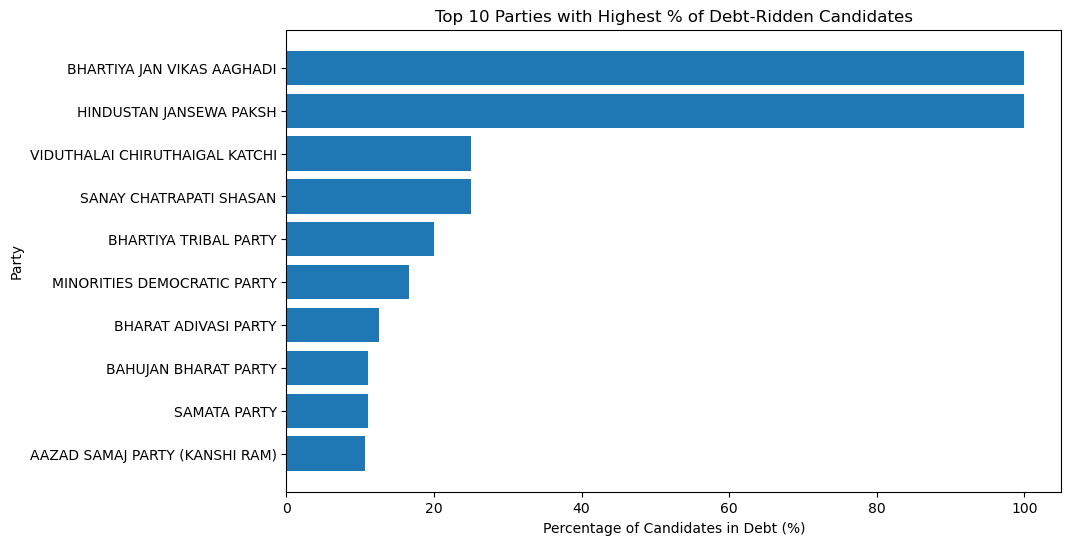

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your file
# file_path = "total_cnd_Most_important_final_file_2.csv"
# df = pd.read_csv(file_path)

# Convert to numeric safely
df["Total_Assets_Value"] = pd.to_numeric(df["Total_Assets_Value"], errors="coerce")
df["Liabilities_Value"] = pd.to_numeric(df["Liabilities_Value"], errors="coerce")

# Add Has_Debt column
df["Has_Debt"] = df["Liabilities_Value"] > df["Total_Assets_Value"]

# Party wise analysis
party_debt = df.groupby("Party_std")["Has_Debt"].sum().reset_index()
party_debt = party_debt.rename(columns={"Has_Debt": "Debt_Candidates"})

party_total = df.groupby("Party_std")["Candidate"].count().reset_index()
party_total = party_total.rename(columns={"Candidate": "Total_Candidates"})

# Merge
party_analysis = pd.merge(party_total, party_debt, on="Party_std", how="left")
party_analysis["Debt_Percentage"] = (party_analysis["Debt_Candidates"] / party_analysis["Total_Candidates"]) * 100

# Sort
party_analysis = party_analysis.sort_values(by="Debt_Percentage", ascending=False)

# Save results
party_analysis.to_csv("party_wise_debt_analysis.csv", index=False)

# Visualization (Top 10 parties)
top10 = party_analysis.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["Party_std"], top10["Debt_Percentage"])
plt.xlabel("Percentage of Candidates in Debt (%)")
plt.ylabel("Party")
plt.title("Top 10 Parties with Highest % of Debt-Ridden Candidates")
plt.gca().invert_yaxis()
plt.show()


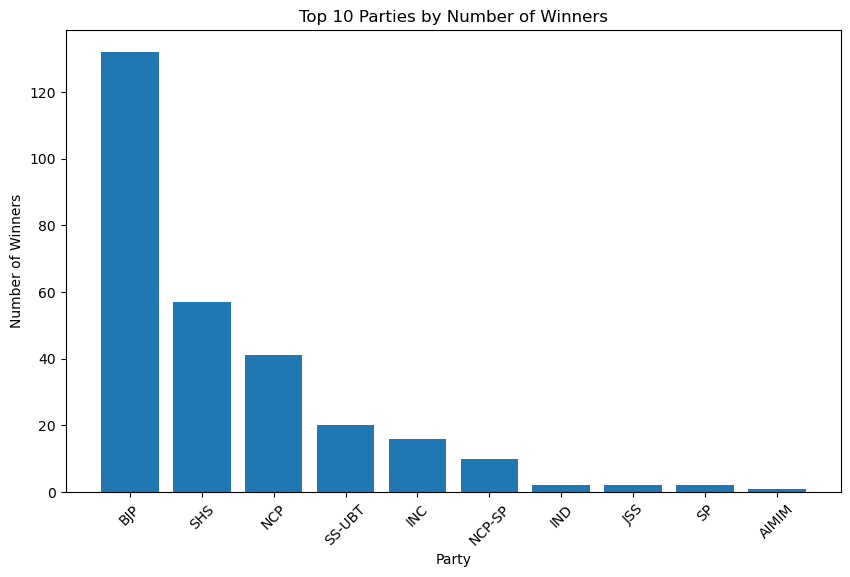

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file
# file_path = "total_cnd_Most_important_final_file_2.csv"
# df = pd.read_csv(file_path)

# Count winners per party
winners = df[df["Winner_Flag"] == 1]
party_winners = winners.groupby("Party_std")["Candidate"].count().reset_index()
party_winners = party_winners.rename(columns={"Candidate": "Winner_Count"})
party_winners = party_winners.sort_values(by="Winner_Count", ascending=False)

# Plot top 10
top10 = party_winners.head(10)
plt.figure(figsize=(10,6))
plt.bar(top10["Party_std"], top10["Winner_Count"])
plt.xlabel("Party")
plt.ylabel("Number of Winners")
plt.title("Top 10 Parties by Number of Winners")
plt.xticks(rotation=45)
plt.show()


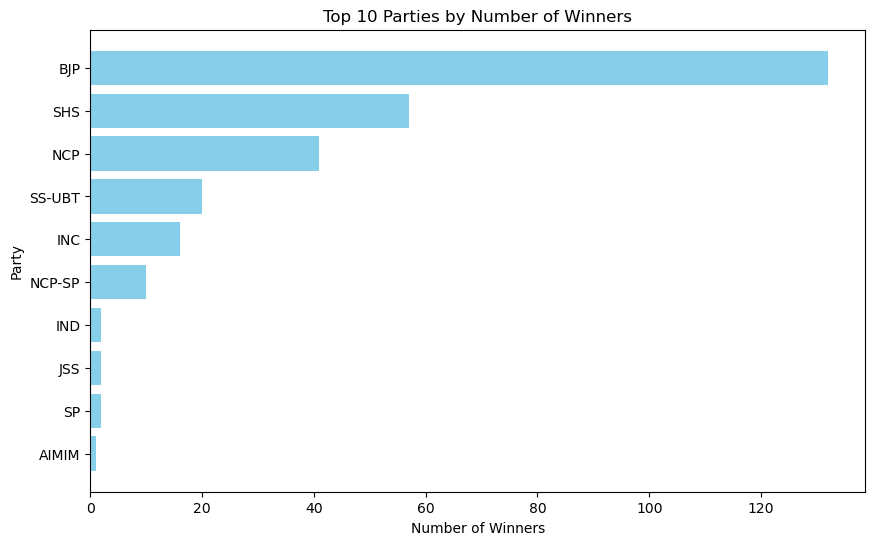

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file
# file_path = "total_cnd_Most_important_final_file_2.csv"
# df = pd.read_csv(file_path)

# Filter winners
winners = df[df["Winner_Flag"] == 1]

# Party-wise winner count
party_winners = winners.groupby("Party_std")["Candidate"].count().reset_index()
party_winners = party_winners.rename(columns={"Candidate": "Winner_Count"})
party_winners = party_winners.sort_values(by="Winner_Count", ascending=False)

# Plot top 10
top10 = party_winners.head(10)

plt.figure(figsize=(10,6))
plt.barh(top10["Party_std"], top10["Winner_Count"], color="skyblue")
plt.xlabel("Number of Winners")
plt.ylabel("Party")
plt.title("Top 10 Parties by Number of Winners")
plt.gca().invert_yaxis()
plt.show()


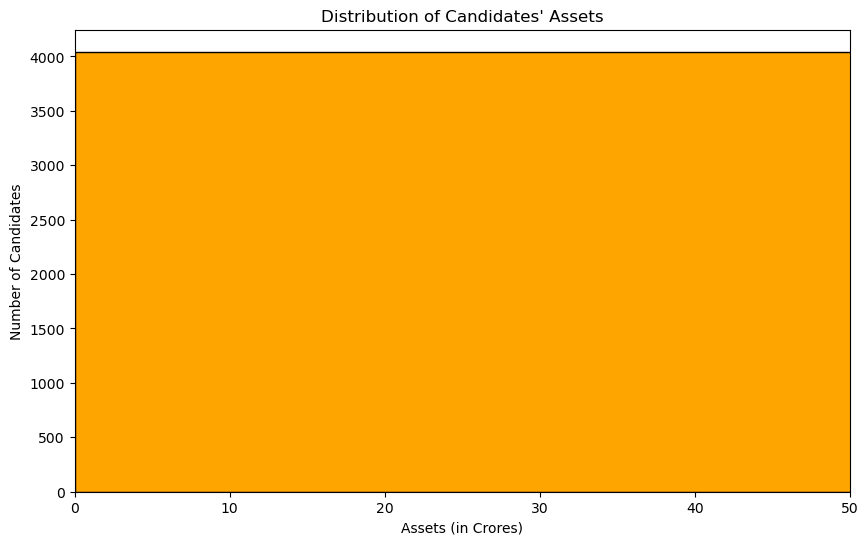

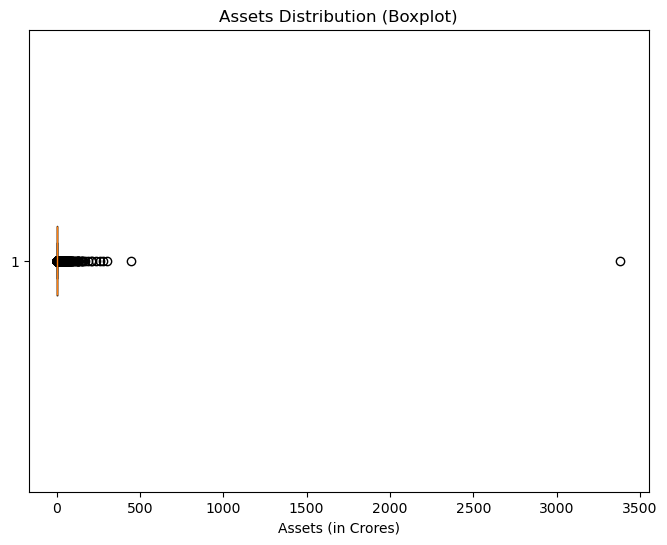

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file
# file_path = "total_cnd_Most_important_final_file_2.csv"
# df = pd.read_csv(file_path)

# Convert assets to numeric
df["Total_Assets_Value"] = pd.to_numeric(df["Total_Assets_Value"], errors="coerce")

# Plot histogram (distribution of candidate wealth)
plt.figure(figsize=(10,6))
plt.hist(df["Total_Assets_Value"] / 10000000, bins=50, color="orange", edgecolor="black")
plt.xlabel("Assets (in Crores)")
plt.ylabel("Number of Candidates")
plt.title("Distribution of Candidates' Assets")
plt.xlim(0, 50)  # zoom in (ignore super rich outliers > 50 crores)
plt.show()

# Boxplot to see median & outliers
plt.figure(figsize=(8,6))
plt.boxplot(df["Total_Assets_Value"] / 10000000, vert=False)
plt.xlabel("Assets (in Crores)")
plt.title("Assets Distribution (Boxplot)")
plt.show()


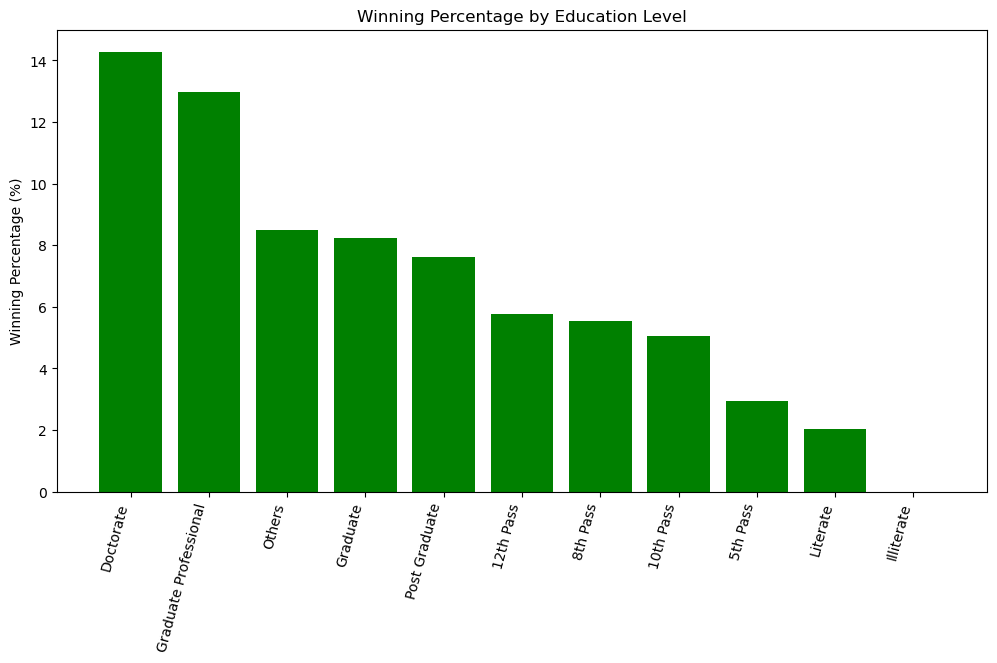

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file
# file_path = "total_cnd_Most_important_final_file_2.csv"
# df = pd.read_csv(file_path)

# Count winners grouped by Education
edu_winners = df[df["Winner_Flag"] == 1].groupby("Education")["Candidate"].count().reset_index()
edu_winners = edu_winners.rename(columns={"Candidate": "Winner_Count"})

# Count total candidates grouped by Education
edu_total = df.groupby("Education")["Candidate"].count().reset_index()
edu_total = edu_total.rename(columns={"Candidate": "Total_Candidates"})

# Merge both
edu_analysis = pd.merge(edu_total, edu_winners, on="Education", how="left").fillna(0)

# Calculate winning percentage
edu_analysis["Winning_Percentage"] = (edu_analysis["Winner_Count"] / edu_analysis["Total_Candidates"]) * 100

# Sort by winning percentage
edu_analysis = edu_analysis.sort_values(by="Winning_Percentage", ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(edu_analysis["Education"], edu_analysis["Winning_Percentage"], color="green")
plt.xticks(rotation=75, ha="right")
plt.ylabel("Winning Percentage (%)")
plt.title("Winning Percentage by Education Level")
plt.show()


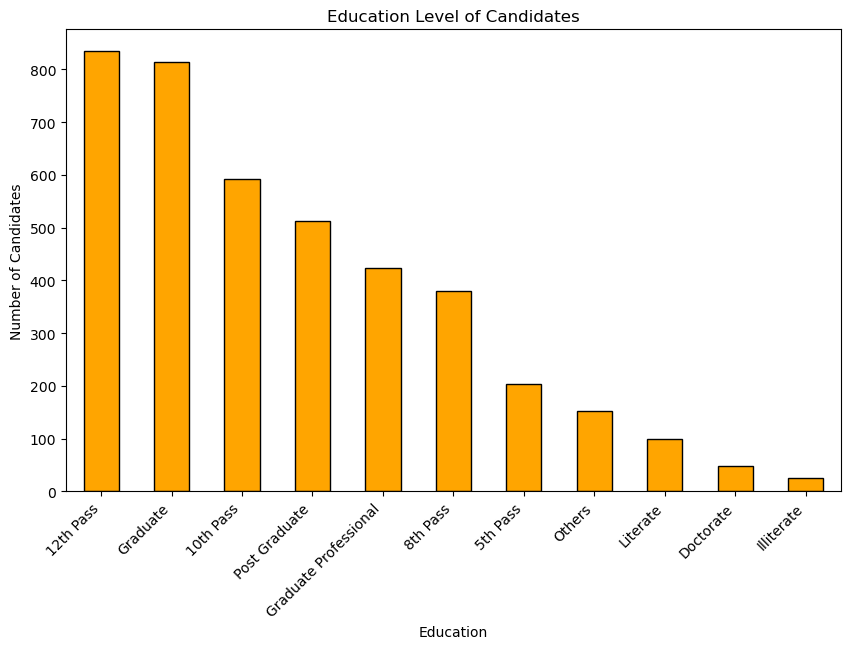

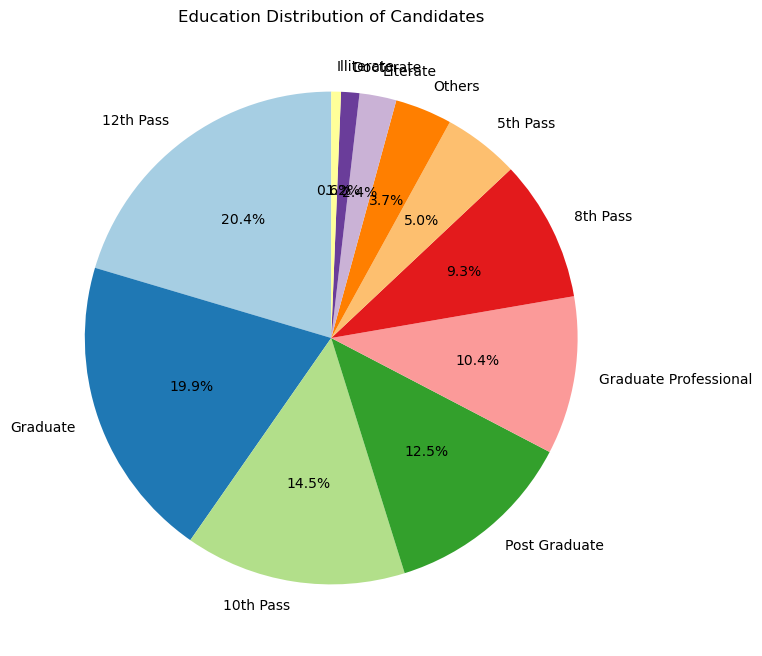

In [11]:
import matplotlib.pyplot as plt

# Count number of candidates by education
education_counts = df["Education"].value_counts()

# Plot as a bar chart
plt.figure(figsize=(10,6))
education_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Education Level of Candidates")
plt.xlabel("Education")
plt.ylabel("Number of Candidates")
plt.xticks(rotation=45, ha="right")
plt.show()

# Optional: Pie chart
plt.figure(figsize=(8,8))
education_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=plt.cm.Paired.colors)
plt.title("Education Distribution of Candidates")
plt.ylabel("")  # Hide y-label
plt.show()


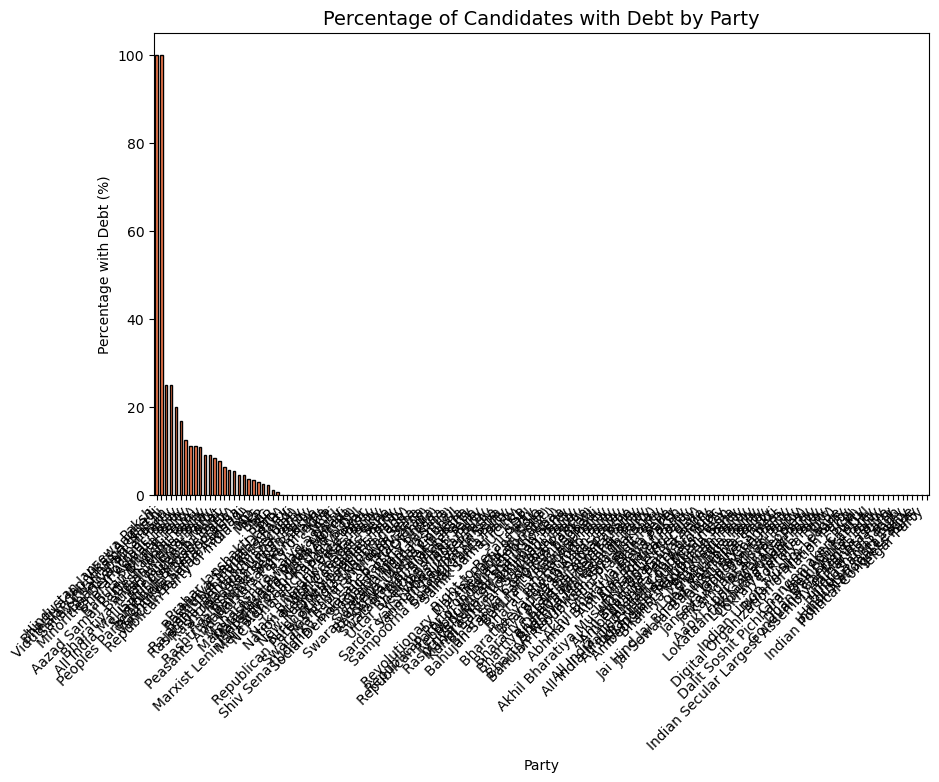

In [12]:
import matplotlib.pyplot as plt

# Group by Party and calculate percentage of candidates with debt
party_debt = df.groupby("Party")["Has_Debt"].mean().sort_values(ascending=False) * 100

# Plot
plt.figure(figsize=(10,6))
party_debt.plot(kind="bar", color="coral", edgecolor="black")

plt.title("Percentage of Candidates with Debt by Party", fontsize=14)
plt.xlabel("Party")
plt.ylabel("Percentage with Debt (%)")
plt.xticks(rotation=45, ha="right")
plt.show()


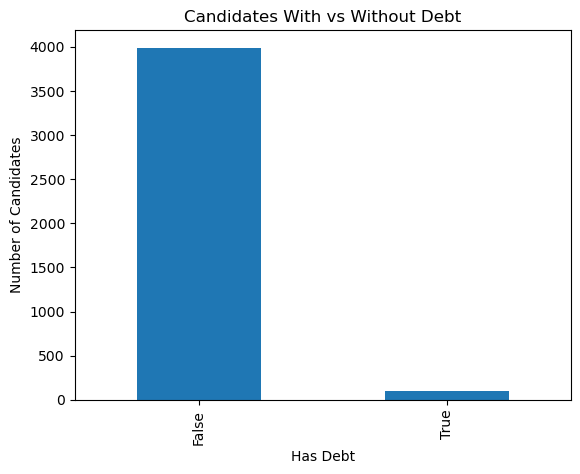

In [13]:
import matplotlib.pyplot as plt

df['Has_Debt'].value_counts().plot(kind='bar')

plt.title("Candidates With vs Without Debt")
plt.xlabel("Has Debt")
plt.ylabel("Number of Candidates")
plt.show()


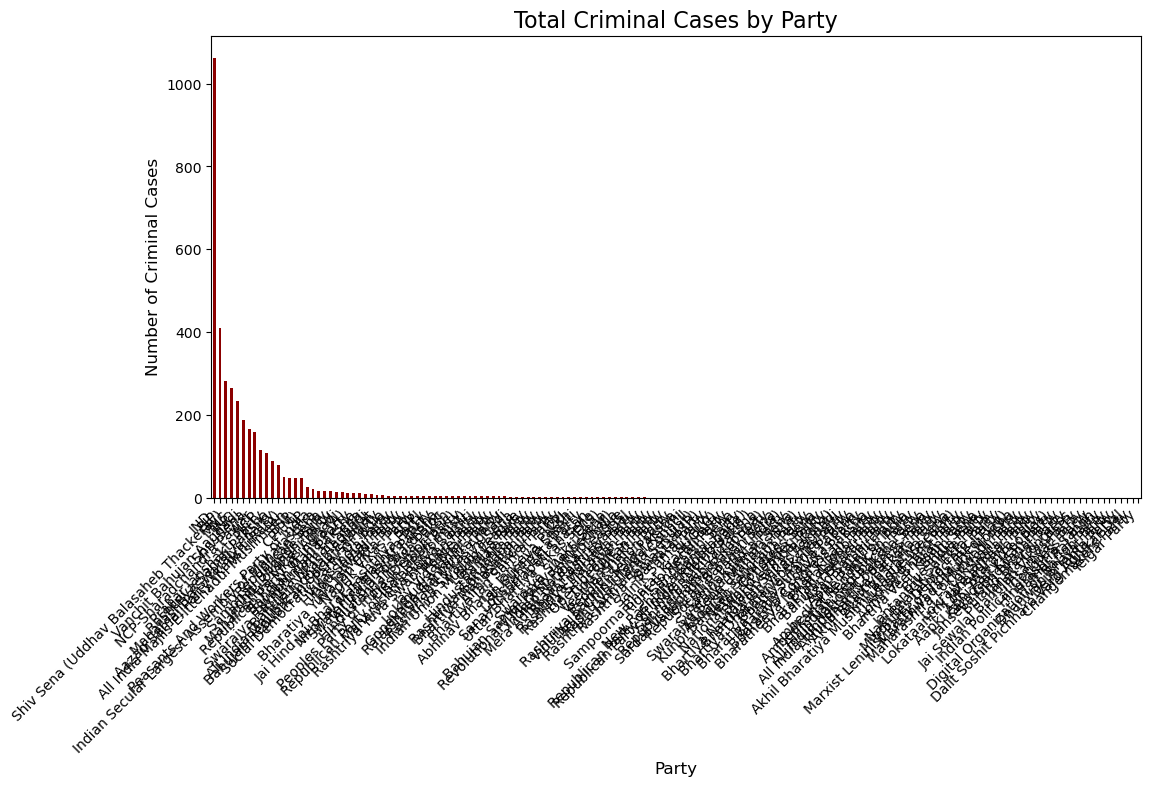

In [14]:
import matplotlib.pyplot as plt

# Group by party and sum up criminal cases
criminal_cases_party = df.groupby("Party")["Criminal_Case"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
criminal_cases_party.plot(kind="bar", color="darkred")

plt.title("Total Criminal Cases by Party", fontsize=16)
plt.xlabel("Party", fontsize=12)
plt.ylabel("Number of Criminal Cases", fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.show()


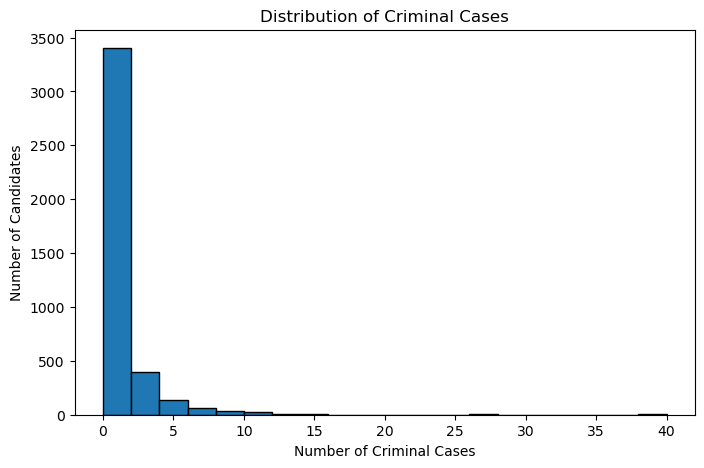

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['Criminal_Case'].plot(kind='hist', bins=20, edgecolor='black')
plt.title("Distribution of Criminal Cases")
plt.xlabel("Number of Criminal Cases")
plt.ylabel("Number of Candidates")
plt.show()


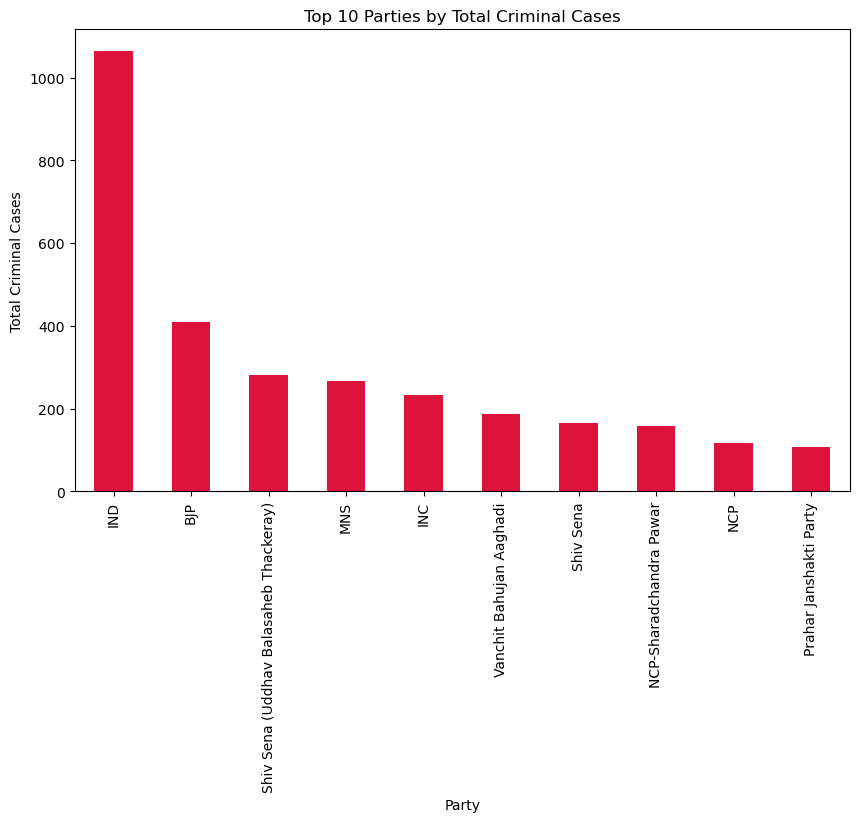

In [16]:
top_parties_cases = df.groupby("Party")['Criminal_Case'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_parties_cases.plot(kind='bar', color='crimson')
plt.title("Top 10 Parties by Total Criminal Cases")
plt.xlabel("Party")
plt.ylabel("Total Criminal Cases")
plt.xticks(rotation=90)
plt.show()


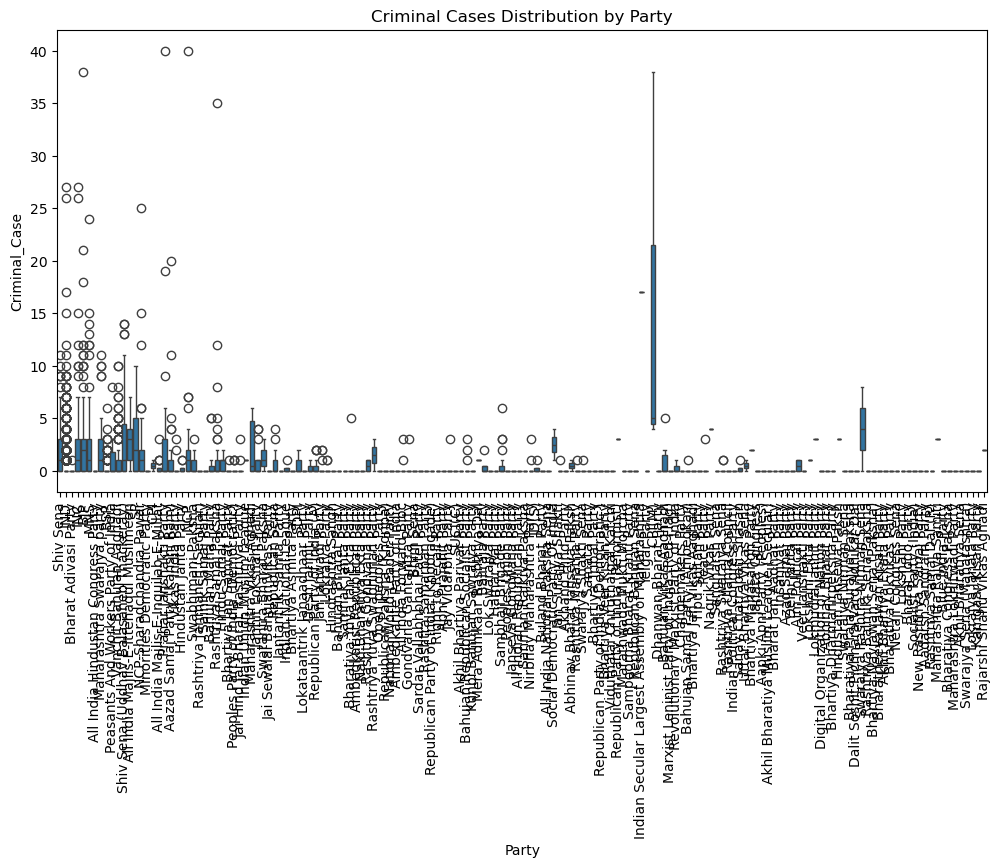

In [17]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="Party", y="Criminal_Case", data=df)
plt.xticks(rotation=90)
plt.title("Criminal Cases Distribution by Party")
plt.show()


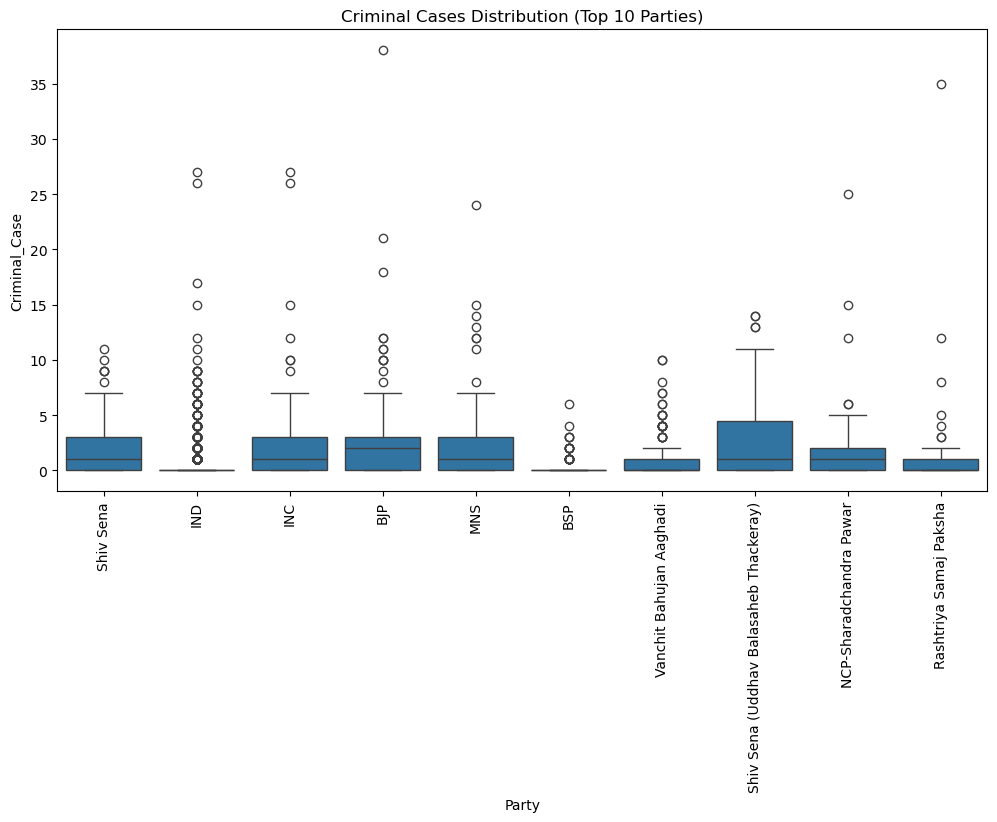

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 parties with most candidates
top_parties = df['Party'].value_counts().head(10).index
df_top = df[df['Party'].isin(top_parties)]

plt.figure(figsize=(12,6))
sns.boxplot(x="Party", y="Criminal_Case", data=df_top)
plt.xticks(rotation=90)
plt.title("Criminal Cases Distribution (Top 10 Parties)")
plt.show()


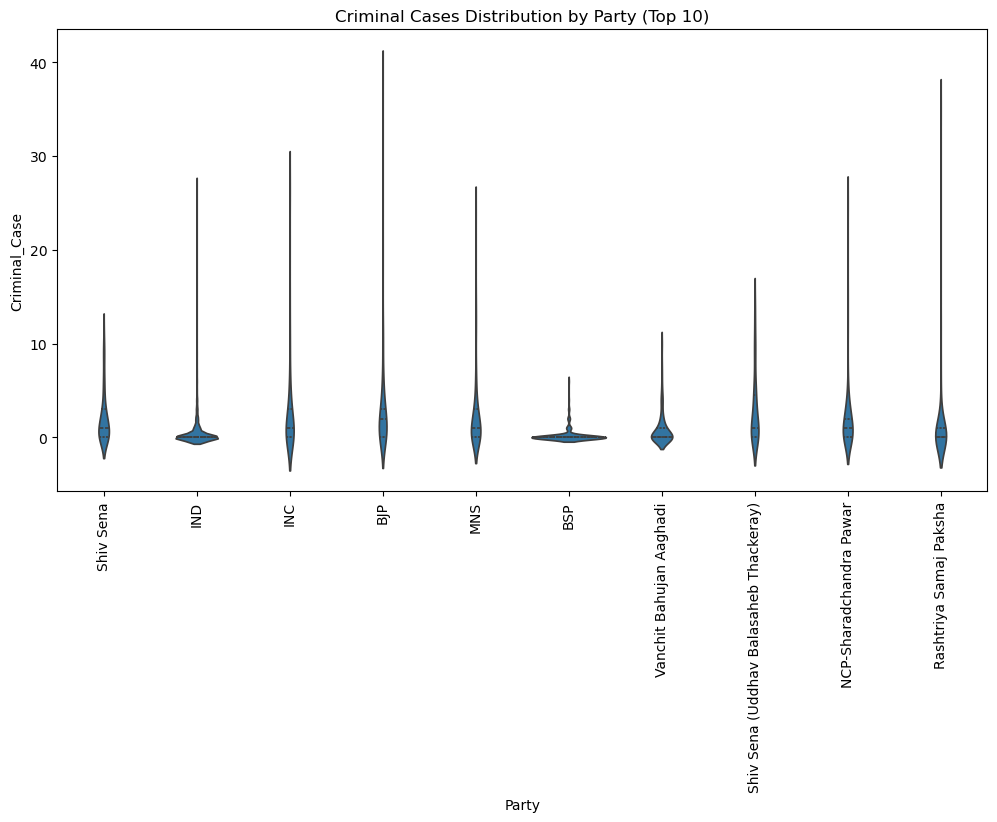

In [19]:
plt.figure(figsize=(12,6))
sns.violinplot(x="Party", y="Criminal_Case", data=df_top, inner="quart")
plt.xticks(rotation=90)
plt.title("Criminal Cases Distribution by Party (Top 10)")
plt.show()


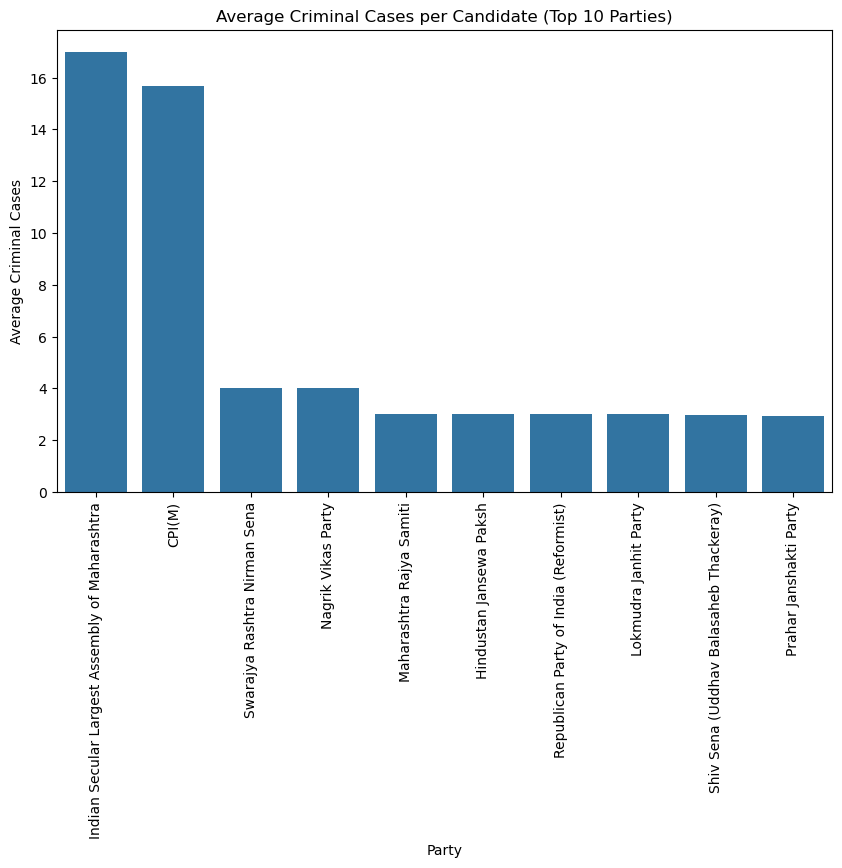

In [20]:
avg_cases = df.groupby("Party")["Criminal_Case"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_cases.index, y=avg_cases.values)
plt.xticks(rotation=90)
plt.title("Average Criminal Cases per Candidate (Top 10 Parties)")
plt.ylabel("Average Criminal Cases")
plt.show()


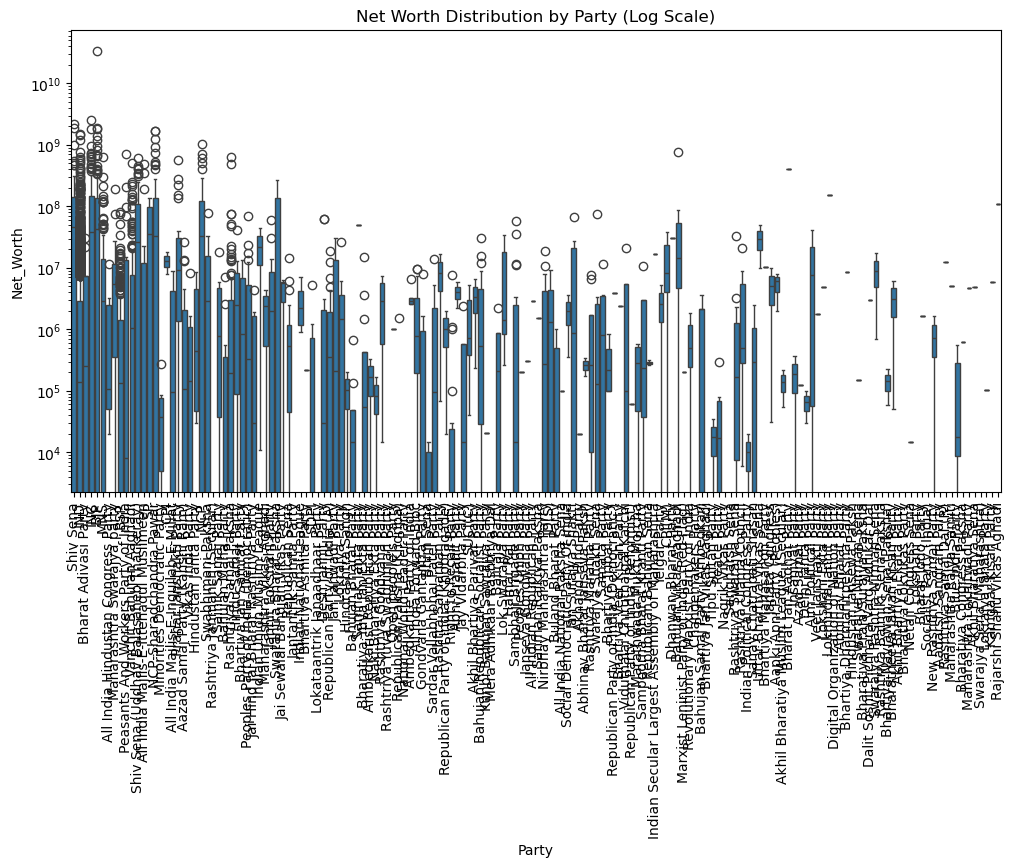

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Party", y="Net_Worth", data=df)
plt.xticks(rotation=90)
plt.yscale("log")  # scale to handle very large values
plt.title("Net Worth Distribution by Party (Log Scale)")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13228\673670388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Net_Worth", y="Candidate", data=top_rich, palette="viridis")


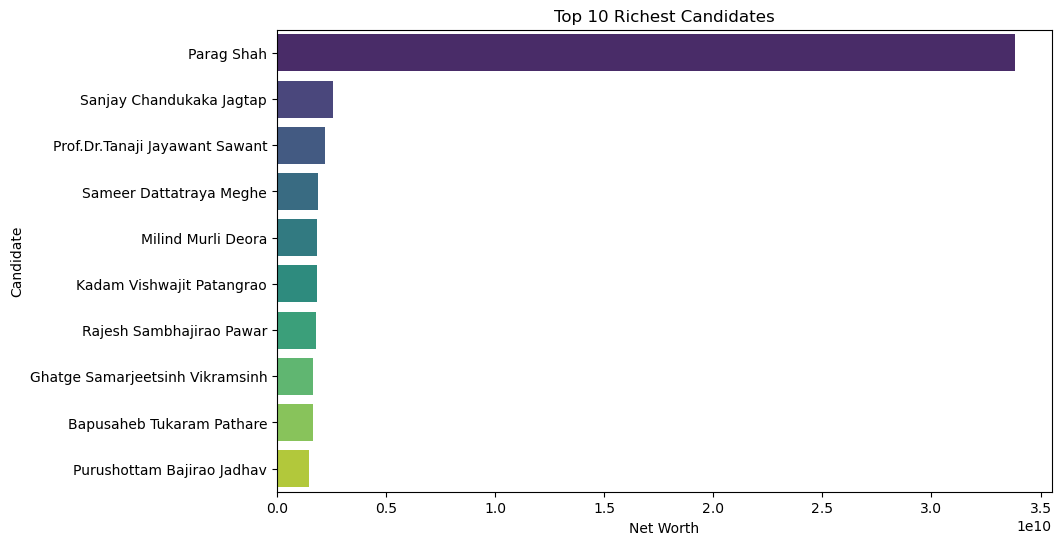

In [22]:
top_rich = df.nlargest(10, "Net_Worth")

plt.figure(figsize=(10,6))
sns.barplot(x="Net_Worth", y="Candidate", data=top_rich, palette="viridis")
plt.title("Top 10 Richest Candidates")
plt.xlabel("Net Worth")
plt.ylabel("Candidate")
plt.show()


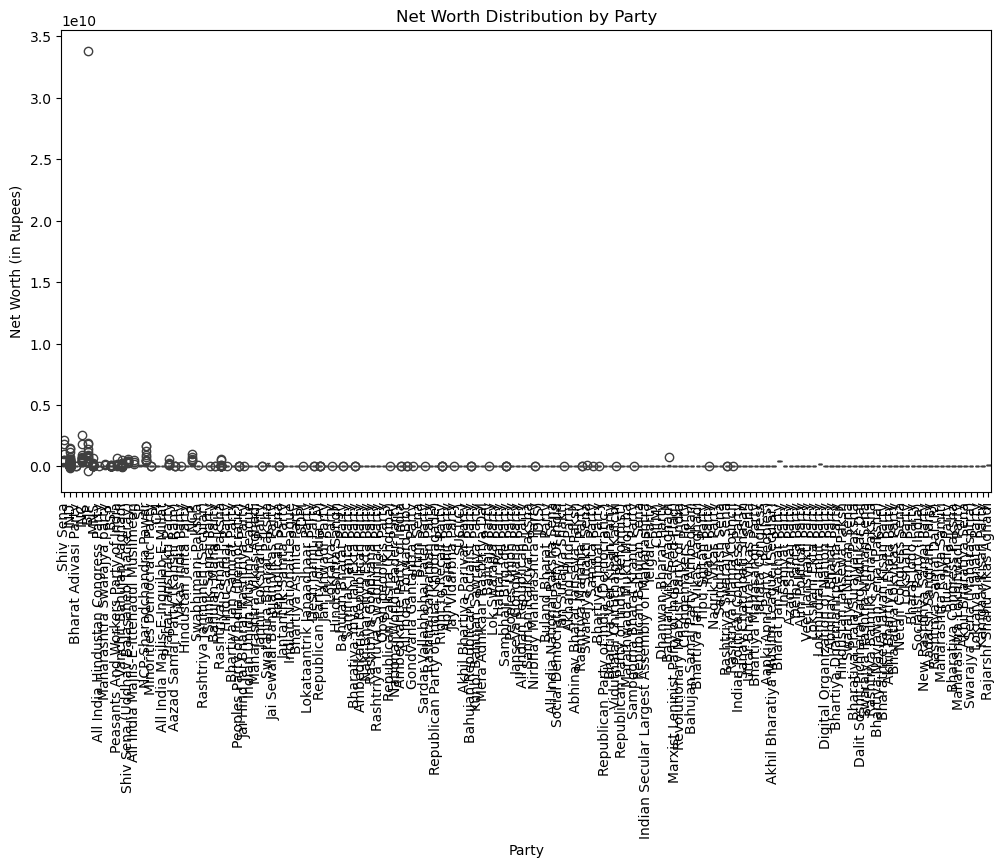

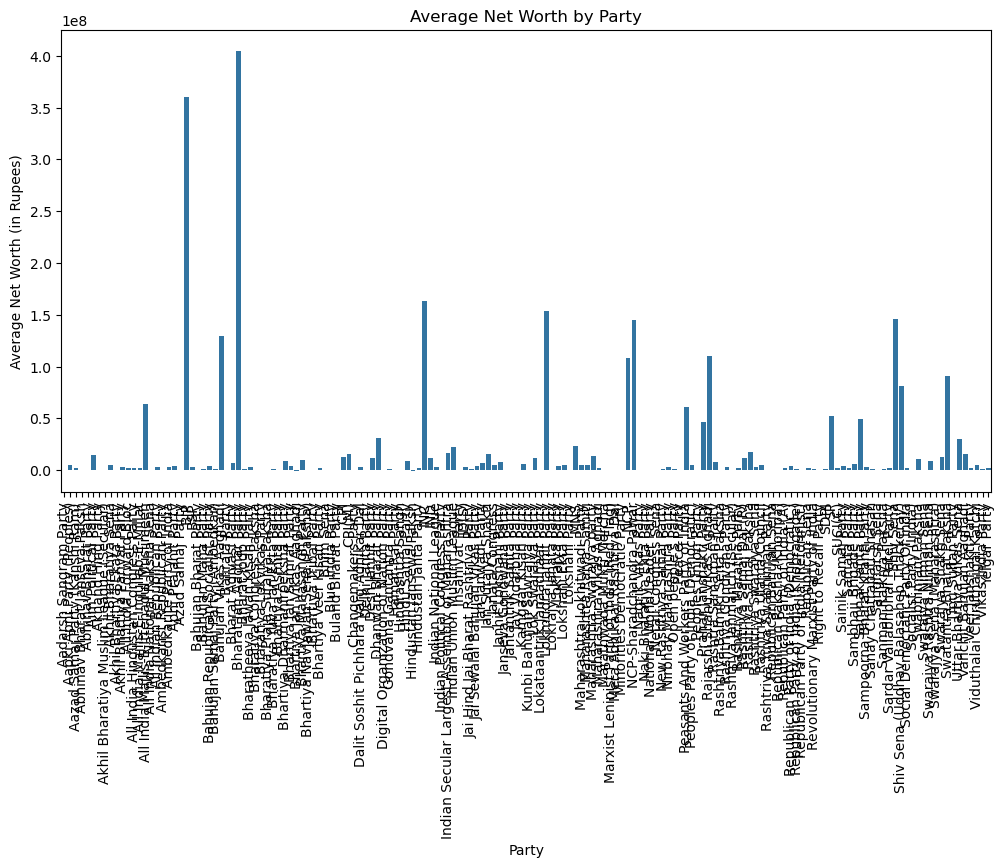

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for distribution
plt.figure(figsize=(12,6))
sns.boxplot(x="Party", y="Net_Worth", data=df)
plt.xticks(rotation=90)
plt.title("Net Worth Distribution by Party")
plt.ylabel("Net Worth (in Rupees)")
plt.show()

# Barplot for average net worth
plt.figure(figsize=(12,6))
avg_networth = df.groupby("Party")["Net_Worth"].mean().reset_index()
sns.barplot(x="Party", y="Net_Worth", data=avg_networth)
plt.xticks(rotation=90)
plt.title("Average Net Worth by Party")
plt.ylabel("Average Net Worth (in Rupees)")
plt.show()


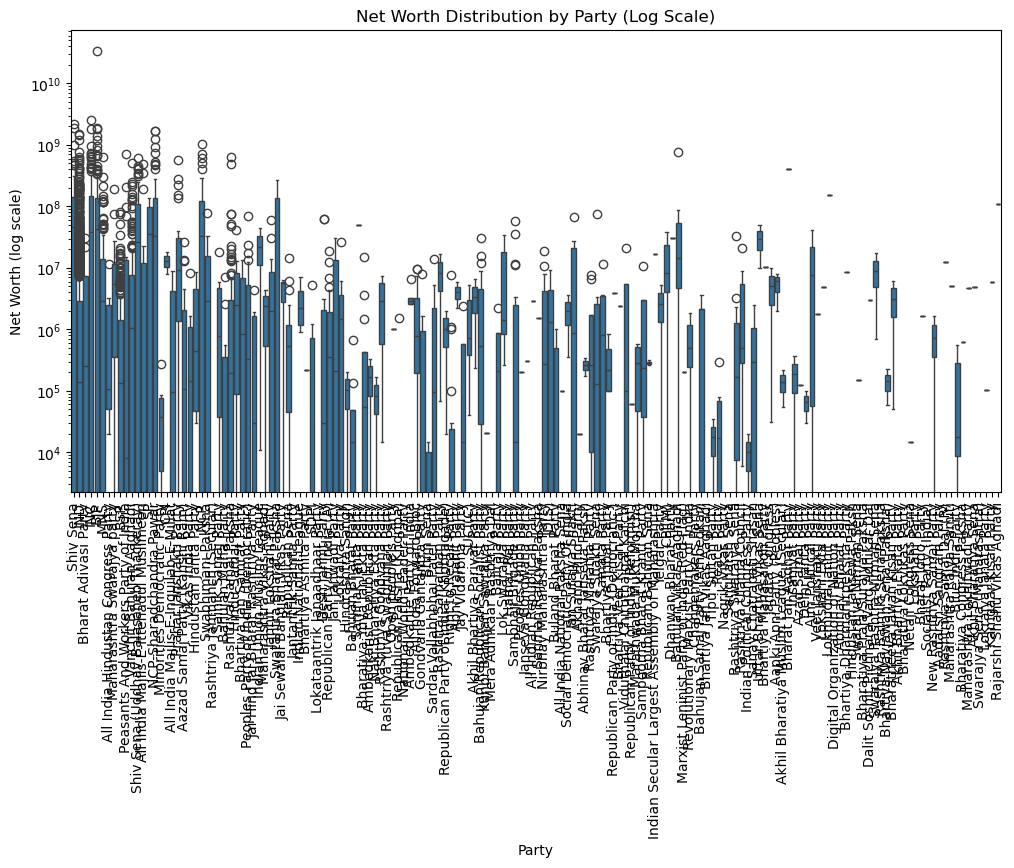

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
sns.boxplot(x="Party", y="Net_Worth", data=df)
plt.yscale("log")  # log scale handles huge variations
plt.xticks(rotation=90)
plt.title("Net Worth Distribution by Party (Log Scale)")
plt.ylabel("Net Worth (log scale)")
plt.show()


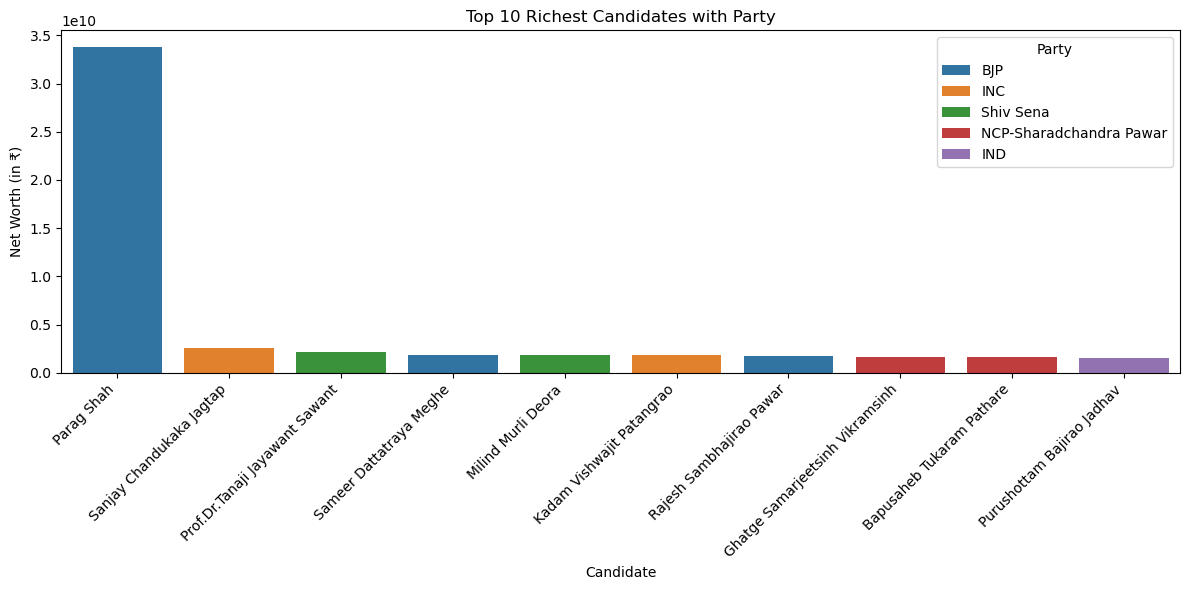

                            Candidate                    Party Net_Worth_Words
2471                       Parag Shah                      BJP  3382.68 Crore+
2861         Sanjay Chandukaka Jagtap                      INC   254.91 Crore+
3515   Prof.Dr.Tanaji Jayawant Sawant                Shiv Sena   218.16 Crore+
687           Sameer Dattatraya Meghe                      BJP   186.25 Crore+
2621               Milind Murli Deora                Shiv Sena   185.07 Crore+
4041        Kadam Vishwajit Patangrao                      INC   183.82 Crore+
1335         Rajesh Sambhajirao Pawar                      BJP   178.34 Crore+
3904  Ghatge Samarjeetsinh Vikramsinh  NCP-Sharadchandra Pawar   167.18 Crore+
2931        Bapusaheb Tukaram Pathare  NCP-Sharadchandra Pawar   165.87 Crore+
3738       Purushottam Bajirao Jadhav                      IND   148.50 Crore+


In [25]:
# Sort candidates by Net Worth in descending order
top_rich = df.sort_values(by="Net_Worth", ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Candidate", y="Net_Worth", hue="Party", data=top_rich, dodge=False)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Net Worth (in ₹)")
plt.title("Top 10 Richest Candidates with Party")
plt.tight_layout()
plt.show()

# Also print the table for clarity
print(top_rich[["Candidate", "Party", "Net_Worth_Words"]])


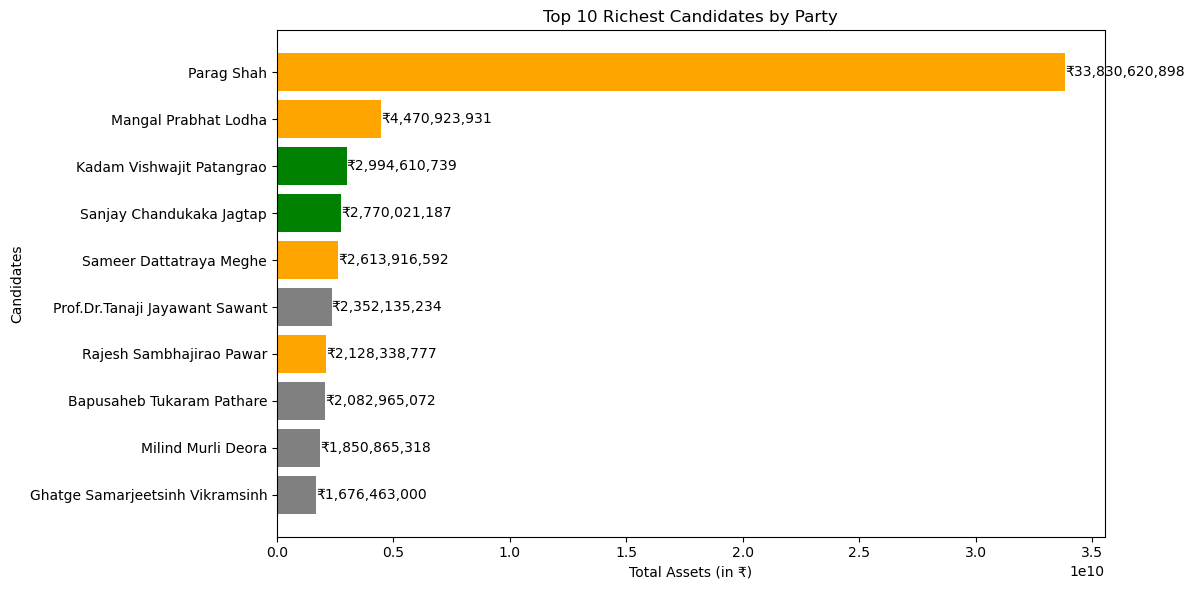

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your file name if needed)
# df = pd.read_csv("winner_list_final.csv")

# Convert Total_Assets_Value to numeric (if not already)
df["Total_Assets_Value"] = pd.to_numeric(df["Total_Assets_Value"], errors="coerce")

# Sort by Total Assets
df_sorted = df.sort_values(by="Total_Assets_Value", ascending=False)

# Select top 10 richest candidates
top_rich = df_sorted.head(10)

# Define party colors
party_colors = {
    "BJP": "orange",
    "INC": "green",   # Tricolor simplified as green
    "NCP": "blue",
    "SHS": "darkorange",  # Shiv Sena
    "SS-UBT": "darkorange", # Shiv Sena (UBT)
}

# Map colors
colors = [party_colors.get(party, "gray") for party in top_rich["Party"]]

# Plot
plt.figure(figsize=(12,6))
plt.barh(top_rich["Candidate"], top_rich["Total_Assets_Value"], color=colors)
plt.xlabel("Total Assets (in ₹)")
plt.ylabel("Candidates")
plt.title("Top 10 Richest Candidates by Party")

# Add values on bars
for index, value in enumerate(top_rich["Total_Assets_Value"]):
    plt.text(value, index, f'₹{value:,.0f}', va='center')

plt.gca().invert_yaxis()  # Richest on top
plt.tight_layout()
plt.show()


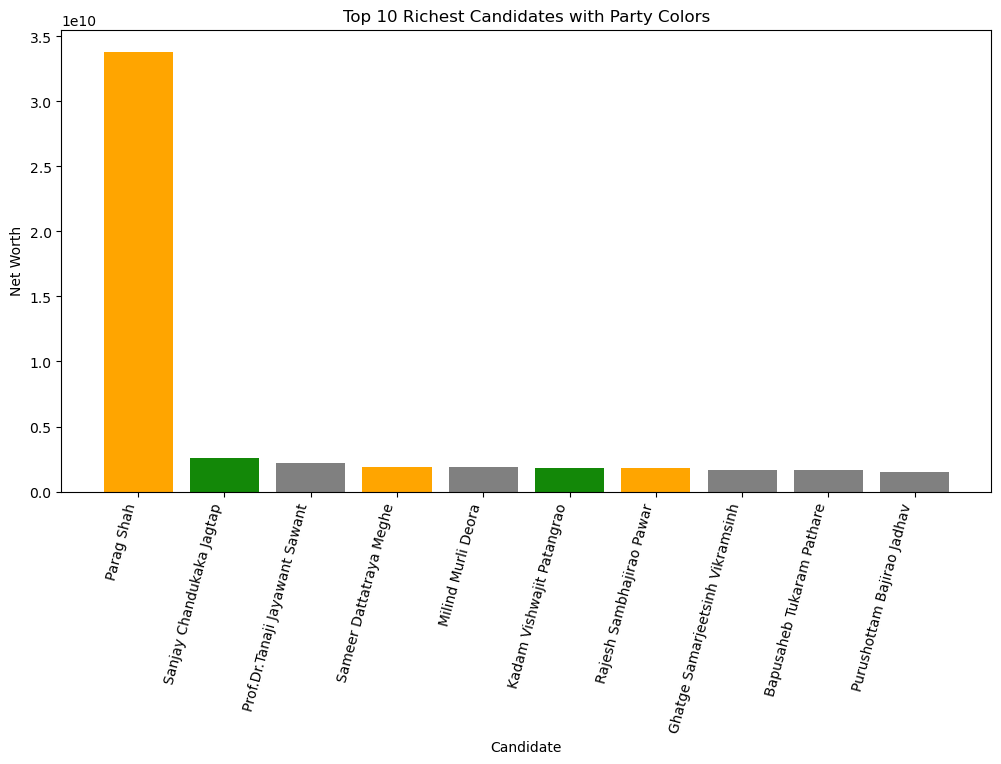

In [27]:
import matplotlib.pyplot as plt

# Sort candidates by Net Worth
top_rich = df.sort_values(by="Net_Worth", ascending=False).head(10)

# Define custom colors for selected parties
party_colors = {
    "BJP": "orange",
    "INC": "#138808",   # Green from tricolor
    "NCP": "blue",
    "SHS": "darkorange"  # Shiv Sena
}

# Assign colors based on party
colors = [party_colors.get(party, "gray") for party in top_rich["Party"]]

# Plot
plt.figure(figsize=(12,6))
plt.bar(top_rich["Candidate"], top_rich["Net_Worth"], color=colors)
plt.xticks(rotation=75, ha='right')
plt.title("Top 10 Richest Candidates with Party Colors")
plt.ylabel("Net Worth")
plt.xlabel("Candidate")
plt.show()


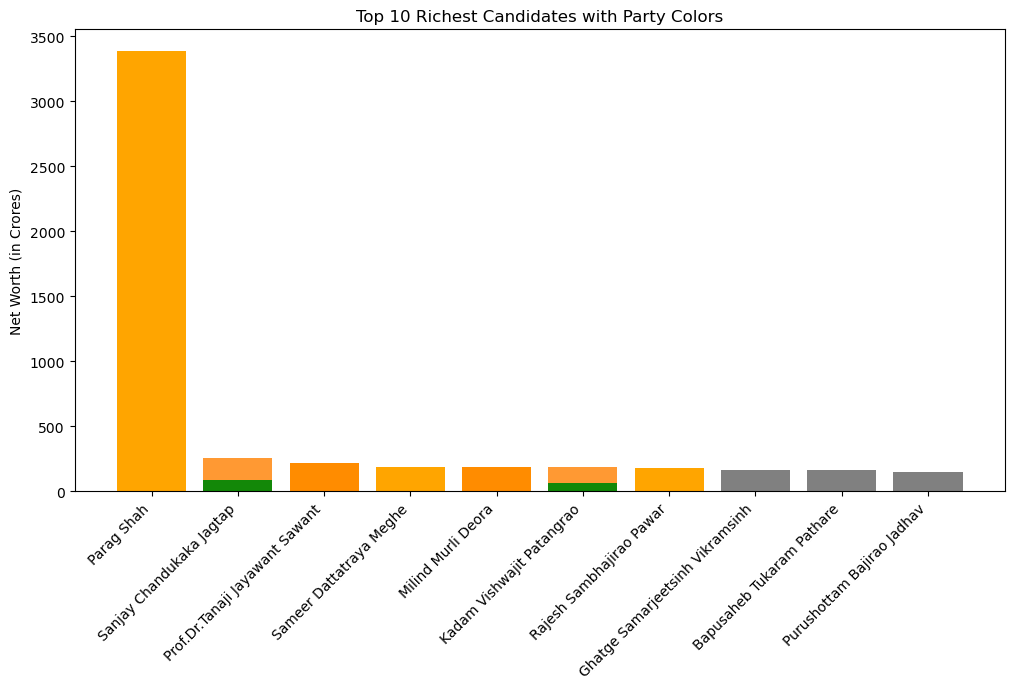

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Party color mapping
party_colors = {
    "BJP": "orange",
    "INC": ["#FF9933", "white", "#138808"],  # saffron, white, green
    "NCP": "blue",
    "SHS": "darkorange"  # Shiv Sena
}

# Take top 10 richest candidates
top_rich = df.sort_values(by="Net_Worth", ascending=False).head(10)

plt.figure(figsize=(12,6))

for idx, row in top_rich.iterrows():
    if row["Party_std"] == "INC":
        # For INC (tricolor effect), draw 3 bars with stripes
        plt.bar(row["Candidate"], row["Net_Worth"]/1e7, color=party_colors["INC"][0])
        plt.bar(row["Candidate"], row["Net_Worth"]/3e7, color=party_colors["INC"][2])
    else:
        plt.bar(row["Candidate"], row["Net_Worth"]/1e7, 
                color=party_colors.get(row["Party_std"], "gray"))

plt.xticks(rotation=45, ha="right")
plt.ylabel("Net Worth (in Crores)")
plt.title("Top 10 Richest Candidates with Party Colors")
plt.show()


In [29]:
import pandas as pd

# Load your CSV file (change path if needed)
# df = pd.read_csv("your_file.csv")

# Ensure Total_Assets_Value is numeric
df["Total_Assets_Value"] = pd.to_numeric(df["Total_Assets_Value"], errors="coerce")

# Sort candidates by wealth (descending order)
top_rich = df.sort_values(by="Total_Assets_Value", ascending=False)

# Select top 10 richest candidates with party names
top_10_rich = top_rich[["Candidate", "Party", "Total_Assets", "Total_Assets_Value"]].head(10)

print("Top 10 Richest Candidates with Party Names:")
print(top_10_rich)

# Save results to CSV
# top_10_rich.to_csv("top_10_rich_candidates.csv", index=False)


Top 10 Richest Candidates with Party Names:
                            Candidate                    Party  \
2471                       Parag Shah                      BJP   
2644             Mangal Prabhat Lodha                      BJP   
4041        Kadam Vishwajit Patangrao                      INC   
2861         Sanjay Chandukaka Jagtap                      INC   
687           Sameer Dattatraya Meghe                      BJP   
3515   Prof.Dr.Tanaji Jayawant Sawant                Shiv Sena   
1335         Rajesh Sambhajirao Pawar                      BJP   
2931        Bapusaheb Tukaram Pathare  NCP-Sharadchandra Pawar   
2621               Milind Murli Deora                Shiv Sena   
3904  Ghatge Samarjeetsinh Vikramsinh  NCP-Sharadchandra Pawar   

                          Total_Assets  Total_Assets_Value  
2471  Rs 33,83,06,20,898 ~ 3383 Crore+         33830620898  
2644    Rs 4,47,09,23,931 ~ 447 Crore+          4470923931  
4041    Rs 2,99,46,10,739 ~ 299 Crore+        

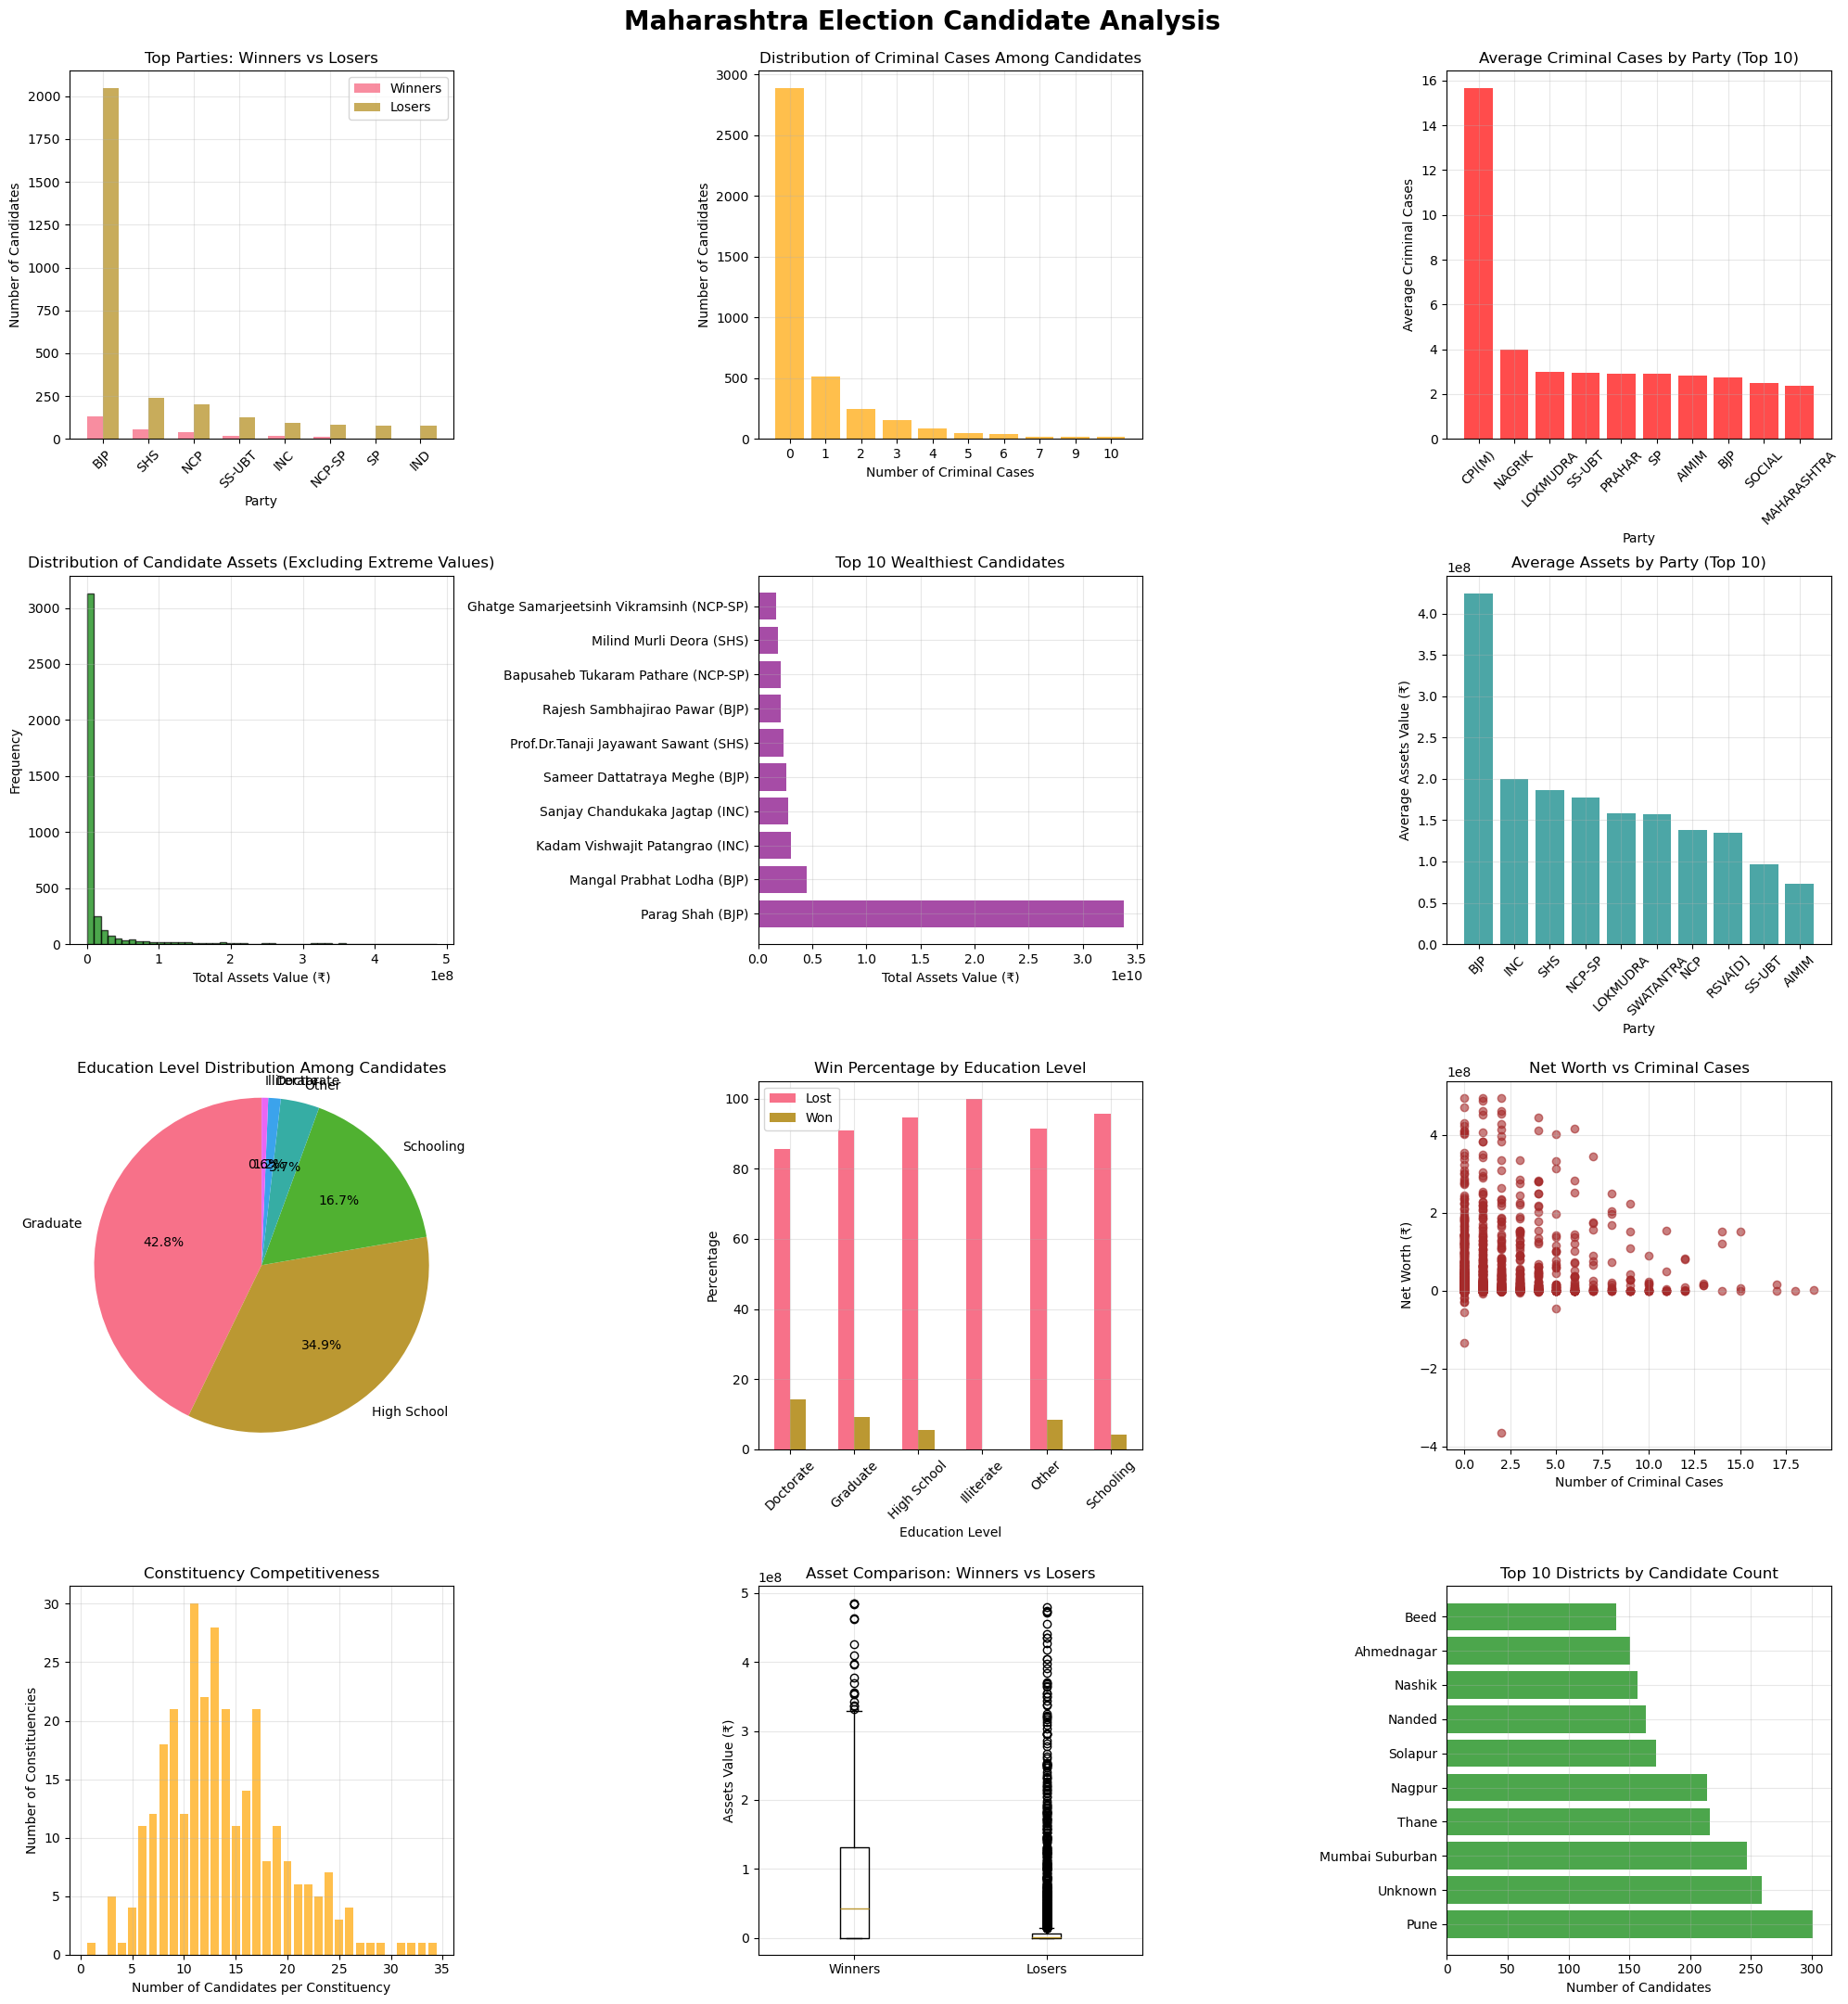

Key Statistics:
Total candidates: 4088
Total winners: 288
Percentage of candidates with criminal cases: 29.33%
Average assets: ₹44985878.95
Median assets: ₹470250.00
Maximum assets: ₹33830620898.00

Top 5 parties by number of winners:
BJP: 132 winners
SHS: 57 winners
NCP: 41 winners
SS-UBT: 20 winners
INC: 16 winners


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set the style for the plots
plt.style.use('default')
sns.set_palette("husl")

# Load the data
# df = pd.read_csv('total_cnd_Most_important_final_file_2.csv')

# Data preprocessing
# Convert asset and liability values to numeric, handling errors and missing values
df['Total_Assets_Value'] = pd.to_numeric(df['Total_Assets_Value'], errors='coerce')
df['Liabilities_Value'] = pd.to_numeric(df['Liabilities_Value'], errors='coerce')
df['Net_Worth'] = pd.to_numeric(df['Net_Worth'], errors='coerce')

# Fill NaN values with 0 for financial columns
df['Total_Assets_Value'].fillna(0, inplace=True)
df['Liabilities_Value'].fillna(0, inplace=True)
df['Net_Worth'].fillna(0, inplace=True)

# Create a simplified party column for better visualization
df['Party_Short'] = df['Party_std'].apply(lambda x: x.split()[0] if pd.notna(x) and len(x.split()) > 0 else 'Other')

# Create a function to categorize education levels
def categorize_education(edu):
    if pd.isna(edu):
        return 'Not Specified'
    edu = str(edu).lower()
    if 'illiterate' in edu:
        return 'Illiterate'
    elif 'literate' in edu or '5th' in edu or '8th' in edu:
        return 'Schooling'
    elif '10th' in edu or '12th' in edu:
        return 'High School'
    elif 'graduate' in edu:
        return 'Graduate'
    elif 'post graduate' in edu:
        return 'Post Graduate'
    elif 'professional' in edu:
        return 'Professional'
    elif 'doctorate' in edu:
        return 'Doctorate'
    else:
        return 'Other'

df['Education_Category'] = df['Education'].apply(categorize_education)

# Create the visualization
fig = plt.figure(figsize=(20, 22))
fig.suptitle('Maharashtra Election Candidate Analysis', fontsize=20, fontweight='bold')

# Create a grid layout
gs = GridSpec(4, 3, figure=fig)

# Plot 1: Party Performance - Winners vs Losers
ax1 = fig.add_subplot(gs[0, 0])
party_winners = df[df['Winner_Flag'] == 1]['Party_Short'].value_counts().head(8)
party_losers = df[df['Winner_Flag'] == 0]['Party_Short'].value_counts().head(8)

x = np.arange(len(party_winners))
width = 0.35

ax1.bar(x - width/2, party_winners.values, width, label='Winners', alpha=0.8)
ax1.bar(x + width/2, party_losers.values, width, label='Losers', alpha=0.8)
ax1.set_xlabel('Party')
ax1.set_ylabel('Number of Candidates')
ax1.set_title('Top Parties: Winners vs Losers')
ax1.set_xticks(x)
ax1.set_xticklabels(party_winners.index, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Criminal Cases Analysis
ax2 = fig.add_subplot(gs[0, 1])
criminal_cases = df['Criminal_Case'].value_counts().head(10)
ax2.bar(range(len(criminal_cases)), criminal_cases.values, color='orange', alpha=0.7)
ax2.set_xlabel('Number of Criminal Cases')
ax2.set_ylabel('Number of Candidates')
ax2.set_title('Distribution of Criminal Cases Among Candidates')
ax2.set_xticks(range(len(criminal_cases)))
ax2.set_xticklabels(criminal_cases.index)
ax2.grid(True, alpha=0.3)

# Plot 3: Criminal Cases by Party
ax3 = fig.add_subplot(gs[0, 2])
party_criminal = df.groupby('Party_Short')['Criminal_Case'].mean().sort_values(ascending=False).head(10)
ax3.bar(range(len(party_criminal)), party_criminal.values, color='red', alpha=0.7)
ax3.set_xlabel('Party')
ax3.set_ylabel('Average Criminal Cases')
ax3.set_title('Average Criminal Cases by Party (Top 10)')
ax3.set_xticks(range(len(party_criminal)))
ax3.set_xticklabels(party_criminal.index, rotation=45)
ax3.grid(True, alpha=0.3)

# Plot 4: Asset Distribution
ax4 = fig.add_subplot(gs[1, 0])
# Filter out extreme values for better visualization
assets_filtered = df[df['Total_Assets_Value'] < 500000000]['Total_Assets_Value']
ax4.hist(assets_filtered, bins=50, color='green', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Total Assets Value (₹)')
ax4.set_ylabel('Frequency')
ax4.set_title('Distribution of Candidate Assets (Excluding Extreme Values)')
ax4.grid(True, alpha=0.3)

# Plot 5: Top 10 Wealthiest Candidates
ax5 = fig.add_subplot(gs[1, 1])
top_assets = df.nlargest(10, 'Total_Assets_Value')[['Candidate', 'Total_Assets_Value', 'Party_Short']]
ax5.barh(range(len(top_assets)), top_assets['Total_Assets_Value'], color='purple', alpha=0.7)
ax5.set_yticks(range(len(top_assets)))
ax5.set_yticklabels(top_assets['Candidate'] + ' (' + top_assets['Party_Short'] + ')')
ax5.set_xlabel('Total Assets Value (₹)')
ax5.set_title('Top 10 Wealthiest Candidates')
ax5.grid(True, alpha=0.3)

# Plot 6: Average Assets by Party
ax6 = fig.add_subplot(gs[1, 2])
party_assets = df.groupby('Party_Short')['Total_Assets_Value'].mean().sort_values(ascending=False).head(10)
ax6.bar(range(len(party_assets)), party_assets.values, color='teal', alpha=0.7)
ax6.set_xlabel('Party')
ax6.set_ylabel('Average Assets Value (₹)')
ax6.set_title('Average Assets by Party (Top 10)')
ax6.set_xticks(range(len(party_assets)))
ax6.set_xticklabels(party_assets.index, rotation=45)
ax6.grid(True, alpha=0.3)

# Plot 7: Education Level Distribution
ax7 = fig.add_subplot(gs[2, 0])
education_dist = df['Education_Category'].value_counts()
ax7.pie(education_dist.values, labels=education_dist.index, autopct='%1.1f%%', startangle=90)
ax7.set_title('Education Level Distribution Among Candidates')
ax7.axis('equal')

# Plot 8: Education vs Winning
ax8 = fig.add_subplot(gs[2, 1])
education_win = pd.crosstab(df['Education_Category'], df['Winner_Flag'])
education_win_percentage = education_win.div(education_win.sum(1), axis=0) * 100
education_win_percentage.plot(kind='bar', ax=ax8)
ax8.set_xlabel('Education Level')
ax8.set_ylabel('Percentage')
ax8.set_title('Win Percentage by Education Level')
ax8.legend(['Lost', 'Won'])
ax8.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 9: Net Worth vs Criminal Cases
ax9 = fig.add_subplot(gs[2, 2])
# Filter extreme values for better visualization
filtered_df = df[(df['Net_Worth'] < 500000000) & (df['Criminal_Case'] < 20)]
ax9.scatter(filtered_df['Criminal_Case'], filtered_df['Net_Worth'], alpha=0.6, color='brown')
ax9.set_xlabel('Number of Criminal Cases')
ax9.set_ylabel('Net Worth (₹)')
ax9.set_title('Net Worth vs Criminal Cases')
ax9.grid(True, alpha=0.3)

# Plot 10: Constituency Competitiveness
ax10 = fig.add_subplot(gs[3, 0])
constituency_counts = df['Constituency_clean_std'].value_counts().value_counts().sort_index()
ax10.bar(constituency_counts.index, constituency_counts.values, color='orange', alpha=0.7)
ax10.set_xlabel('Number of Candidates per Constituency')
ax10.set_ylabel('Number of Constituencies')
ax10.set_title('Constituency Competitiveness')
ax10.grid(True, alpha=0.3)

# Plot 11: Winner vs Loser Asset Comparison
ax11 = fig.add_subplot(gs[3, 1])
winner_assets = df[df['Winner_Flag'] == 1]['Total_Assets_Value']
loser_assets = df[df['Winner_Flag'] == 0]['Total_Assets_Value']
# Filter extreme values
winner_assets = winner_assets[winner_assets < 500000000]
loser_assets = loser_assets[loser_assets < 500000000]

ax11.boxplot([winner_assets, loser_assets], labels=['Winners', 'Losers'])
ax11.set_ylabel('Assets Value (₹)')
ax11.set_title('Asset Comparison: Winners vs Losers')
ax11.grid(True, alpha=0.3)

# Plot 12: District-wise Representation
ax12 = fig.add_subplot(gs[3, 2])
district_counts = df['District'].value_counts().head(10)
ax12.barh(range(len(district_counts)), district_counts.values, color='green', alpha=0.7)
ax12.set_yticks(range(len(district_counts)))
ax12.set_yticklabels(district_counts.index)
ax12.set_xlabel('Number of Candidates')
ax12.set_title('Top 10 Districts by Candidate Count')
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Print some key statistics
print("Key Statistics:")
print(f"Total candidates: {len(df)}")
print(f"Total winners: {df['Winner_Flag'].sum()}")
print(f"Percentage of candidates with criminal cases: {(df['Criminal_Case'] > 0).sum() / len(df) * 100:.2f}%")
print(f"Average assets: ₹{df['Total_Assets_Value'].mean():.2f}")
print(f"Median assets: ₹{df['Total_Assets_Value'].median():.2f}")
print(f"Maximum assets: ₹{df['Total_Assets_Value'].max():.2f}")

# Additional analysis: Top 5 parties by number of winners
top_parties = df[df['Winner_Flag'] == 1]['Party_Short'].value_counts().head(5)
print("\nTop 5 parties by number of winners:")
for party, count in top_parties.items():
    print(f"{party}: {count} winners")

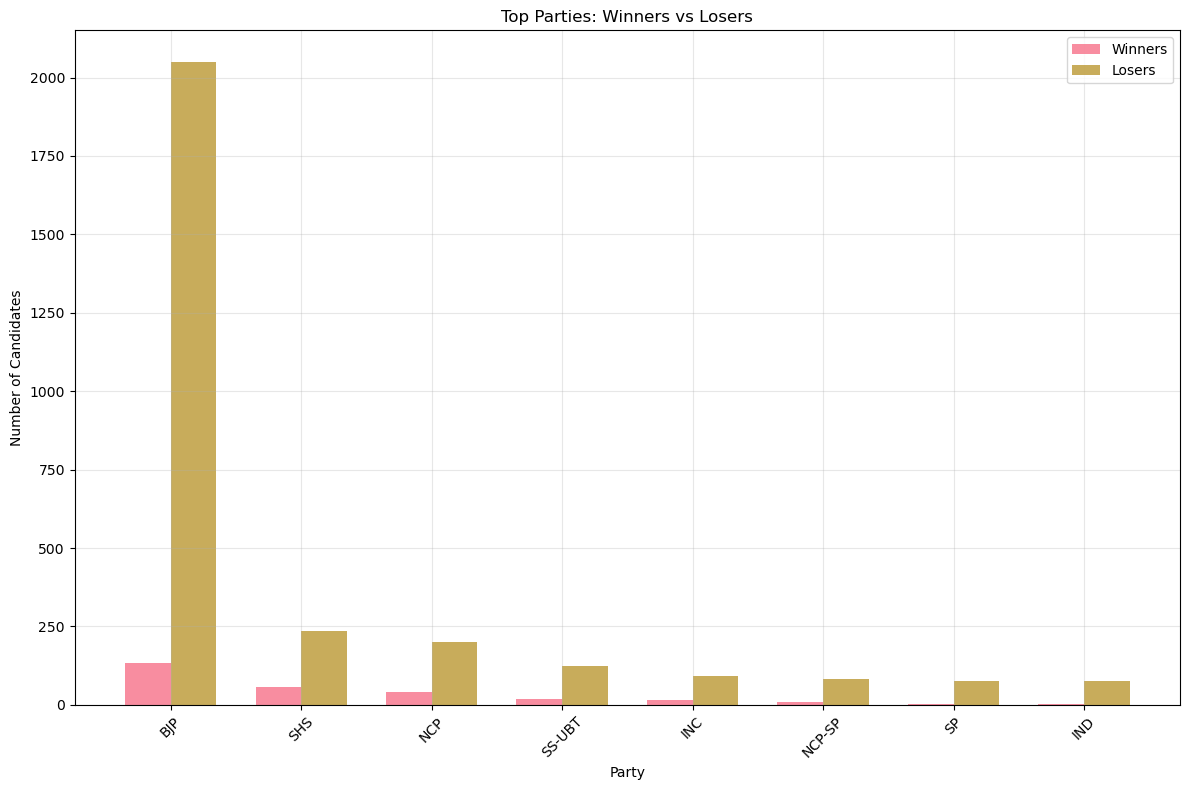

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('total_cnd_Most_important_final_file_2.csv')

# Data preprocessing
df['Total_Assets_Value'] = pd.to_numeric(df['Total_Assets_Value'], errors='coerce')
df['Liabilities_Value'] = pd.to_numeric(df['Liabilities_Value'], errors='coerce')
df['Net_Worth'] = pd.to_numeric(df['Net_Worth'], errors='coerce')

# Fill NaN values with 0 for financial columns
df['Total_Assets_Value'].fillna(0, inplace=True)
df['Liabilities_Value'].fillna(0, inplace=True)
df['Net_Worth'].fillna(0, inplace=True)

# Create a simplified party column for better visualization
df['Party_Short'] = df['Party_std'].apply(lambda x: x.split()[0] if pd.notna(x) and len(x.split()) > 0 else 'Other')

# Plot 1: Party Performance - Winners vs Losers
plt.figure(figsize=(12, 8))
party_winners = df[df['Winner_Flag'] == 1]['Party_Short'].value_counts().head(8)
party_losers = df[df['Winner_Flag'] == 0]['Party_Short'].value_counts().head(8)

x = np.arange(len(party_winners))
width = 0.35

plt.bar(x - width/2, party_winners.values, width, label='Winners', alpha=0.8)
plt.bar(x + width/2, party_losers.values, width, label='Losers', alpha=0.8)
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.title('Top Parties: Winners vs Losers')
plt.xticks(x, party_winners.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

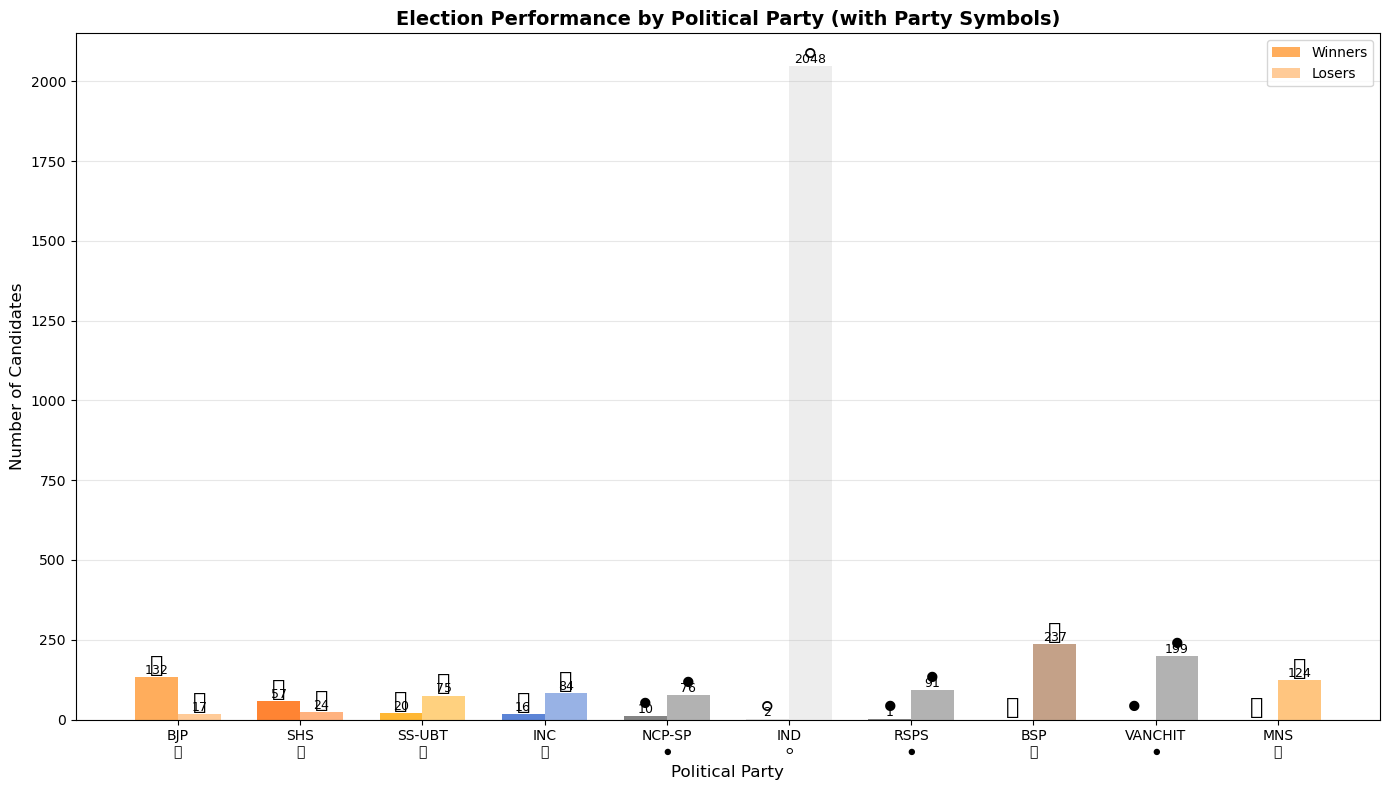


Party Symbols Legend:
🔸 : BJP
🟠 : SHS
🟦 : INC
⚪ : IND
🟫 : BSP
🟧 : MNS
🟠 : SS-UBT

Election Statistics:
Total candidates: 4088
Total winners: 288
Overall success rate: 7.0%

Success Rate by Party:
⚪ IND: 0.1% (2/2050)
🟫 BSP: 0.0% (0/237)
⚫ VANCHIT: 0.0% (0/199)
🔸 BJP: 88.6% (132/149)
🟧 MNS: 0.0% (0/124)
🟦 INC: 16.0% (16/100)
🟠 SS-UBT: 21.1% (20/95)
⚫ RSPS: 1.1% (1/92)
⚫ NCP-SP: 11.6% (10/86)
🟠 SHS: 70.4% (57/81)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('total_cnd_Most_important_final_file_2.csv')

# Data preprocessing
df['Total_Assets_Value'] = pd.to_numeric(df['Total_Assets_Value'], errors='coerce')
df['Liabilities_Value'] = pd.to_numeric(df['Liabilities_Value'], errors='coerce')
df['Net_Worth'] = pd.to_numeric(df['Net_Worth'], errors='coerce')

# Fill NaN values with 0 for financial columns
df['Total_Assets_Value'].fillna(0, inplace=True)
df['Liabilities_Value'].fillna(0, inplace=True)
df['Net_Worth'].fillna(0, inplace=True)

# Create a simplified party column for better visualization
df['Party_Short'] = df['Party_std'].apply(lambda x: x.split()[0] if pd.notna(x) and len(x.split()) > 0 else 'Other')

# Map parties to symbols/emoji (approximate representations)
party_symbols = {
    'BJP': '🔸',  # Saffron color representation
    'SHS': '🟠',  # Shiv Sena - orange
    'INC': '🟦',  # Congress - blue
    'NCP': '🟩',  # NCP - green
    'IND': '⚪',  # Independent - white
    'BSP': '🟫',  # BSP - brown
    'VBA': '🔷',  # Vanchit Bahujan Aaghadi - blue diamond
    'MNS': '🟧',  # MNS - another orange
    'AIMIM': '🟥',  # AIMIM - red
    'SS-UBT': '🟠',  # Shiv Sena UBT - orange
    'Other': '⚫'   # Other parties - black
}

# Get the top 10 parties by number of candidates
top_parties = df['Party_Short'].value_counts().head(10).index.tolist()

# Create a custom color palette based on party symbols
party_colors = {
    'BJP': '#FF9933',  # Saffron
    'SHS': '#FF6600',  # Orange
    'INC': '#3366CC',  # Blue
    'NCP': '#66CC66',  # Green
    'IND': '#DDDDDD',  # Light Gray
    'BSP': '#8B4513',  # SaddleBrown
    'VBA': '#4169E1',  # RoyalBlue
    'MNS': '#FF8C00',  # DarkOrange
    'AIMIM': '#DC143C', # Crimson
    'SS-UBT': '#FFA500', # Orange
    'Other': '#666666'  # Dark Gray
}

# Create the visualization
plt.figure(figsize=(14, 8))

# Get data for winners and losers by party
party_data = []
for party in top_parties:
    party_winners = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 1)])
    party_losers = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 0)])
    party_data.append((party, party_winners, party_losers))

# Sort by number of winners
party_data.sort(key=lambda x: x[1], reverse=True)
parties, winners, losers = zip(*party_data)

x = np.arange(len(parties))
width = 0.35

# Create bars
bars1 = plt.bar(x - width/2, winners, width, label='Winners', 
                color=[party_colors.get(p, '#666666') for p in parties], alpha=0.8)
bars2 = plt.bar(x + width/2, losers, width, label='Losers', 
                color=[party_colors.get(p, '#666666') for p in parties], alpha=0.5)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    plt.text(i - width/2, winners[i] + 0.5, symbol, ha='center', va='bottom', fontsize=16)
    plt.text(i + width/2, losers[i] + 0.5, symbol, ha='center', va='bottom', fontsize=16)

plt.xlabel('Political Party', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.title('Election Performance by Political Party (with Party Symbols)', fontsize=14, fontweight='bold')
plt.xticks(x, [f"{p}\n{symbol}" for p, symbol in zip(parties, [party_symbols.get(p, '⚫') for p in parties])], fontsize=10)
plt.legend()

# Add a grid for better readability
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Create a legend for party symbols
print("\nParty Symbols Legend:")
for party, symbol in party_symbols.items():
    if party in top_parties:
        print(f"{symbol} : {party}")

# Print some statistics
total_winners = df['Winner_Flag'].sum()
total_candidates = len(df)
print(f"\nElection Statistics:")
print(f"Total candidates: {total_candidates}")
print(f"Total winners: {total_winners}")
print(f"Overall success rate: {(total_winners/total_candidates)*100:.1f}%")

# Calculate success rate by party
print("\nSuccess Rate by Party:")
for party in top_parties:
    party_candidates = len(df[df['Party_Short'] == party])
    party_winners = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 1)])
    success_rate = (party_winners/party_candidates)*100 if party_candidates > 0 else 0
    print(f"{party_symbols.get(party, '⚫')} {party}: {success_rate:.1f}% ({party_winners}/{party_candidates})")

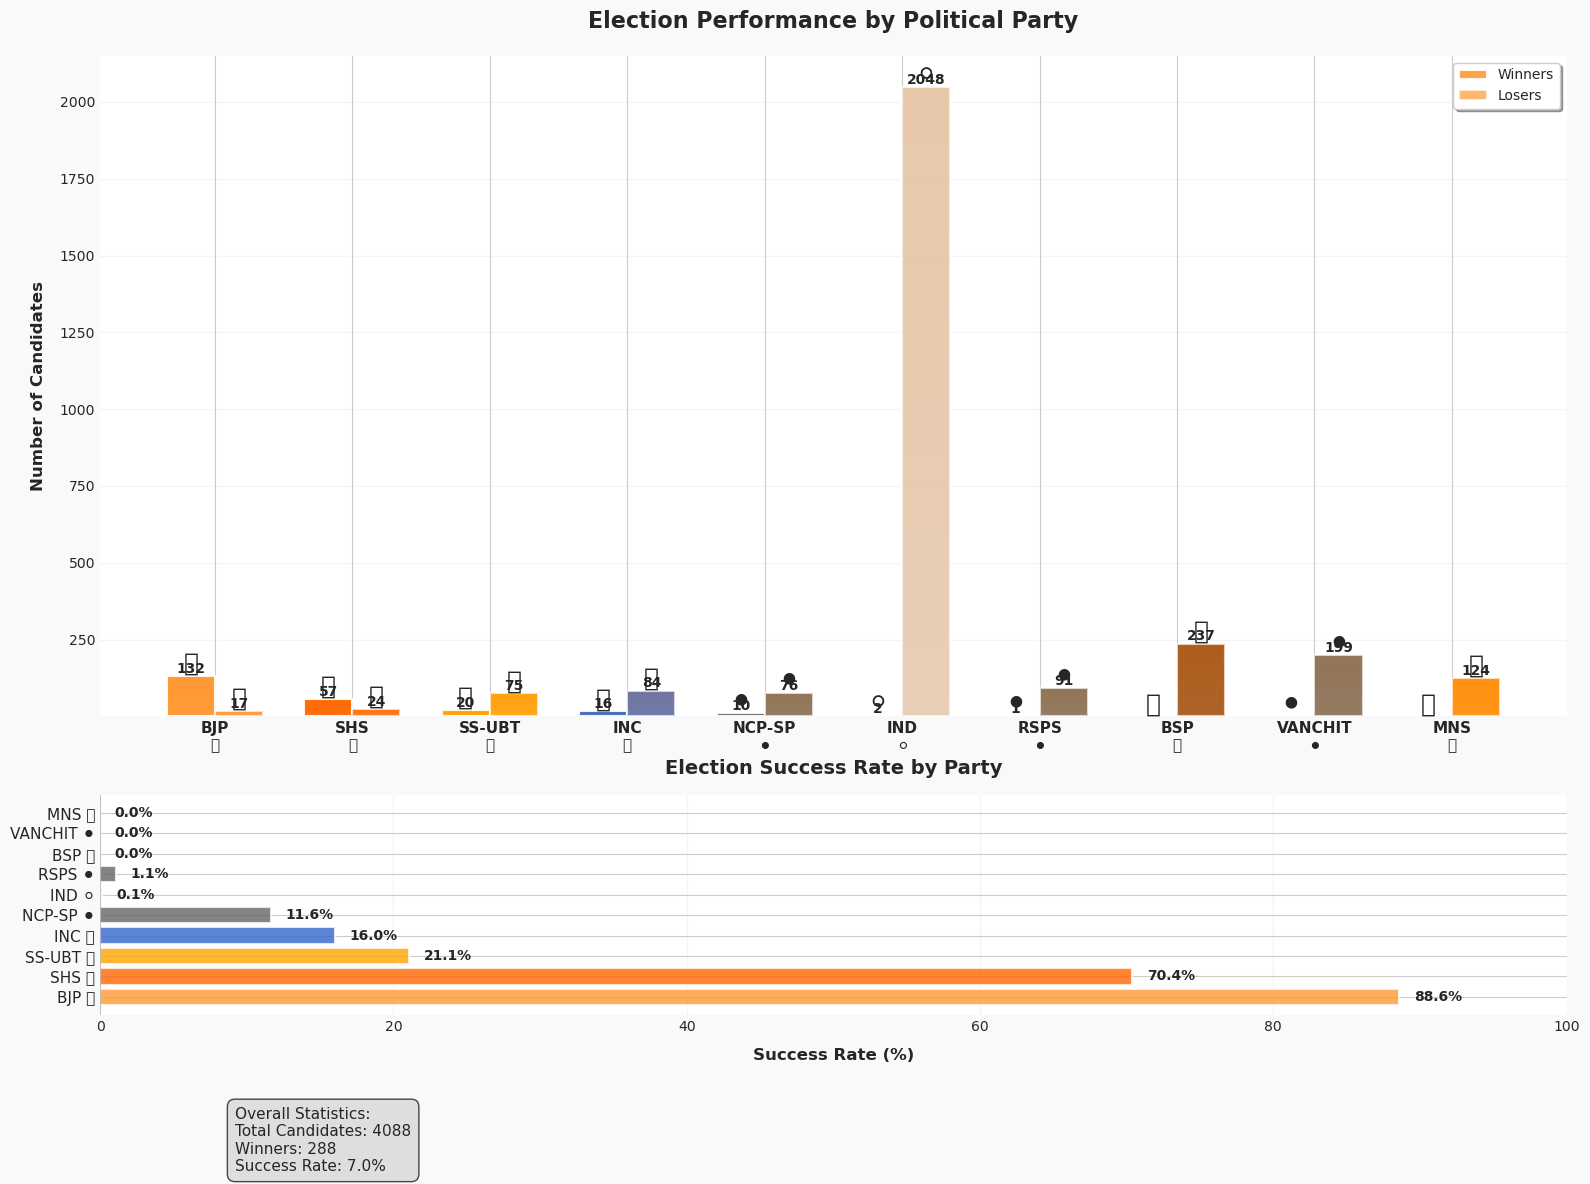


               PARTY SYMBOLS LEGEND               
🔸 : BJP
🟠 : SHS
🟦 : INC
⚪ : IND
🟫 : BSP
🟧 : MNS
🟊 : SS-UBT

              SUCCESS RATES BY PARTY              
⚪ IND: 0.1% (2/2050)
🟫 BSP: 0.0% (0/237)
⚫ VANCHIT: 0.0% (0/199)
🔸 BJP: 88.6% (132/149)
🟧 MNS: 0.0% (0/124)
🟦 INC: 16.0% (16/100)
🟊 SS-UBT: 21.1% (20/95)
⚫ RSPS: 1.1% (1/92)
⚫ NCP-SP: 11.6% (10/86)
🟠 SHS: 70.4% (57/81)


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib as mpl

# Set a professional style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Load the data
df = pd.read_csv('total_cnd_Most_important_final_file_2.csv')

# Data preprocessing
df['Total_Assets_Value'] = pd.to_numeric(df['Total_Assets_Value'], errors='coerce')
df['Liabilities_Value'] = pd.to_numeric(df['Liabilities_Value'], errors='coerce')
df['Net_Worth'] = pd.to_numeric(df['Net_Worth'], errors='coerce')

# Fill NaN values with 0 for financial columns
df['Total_Assets_Value'].fillna(0, inplace=True)
df['Liabilities_Value'].fillna(0, inplace=True)
df['Net_Worth'].fillna(0, inplace=True)

# Create a simplified party column for better visualization
df['Party_Short'] = df['Party_std'].apply(lambda x: x.split()[0] if pd.notna(x) and len(x.split()) > 0 else 'Other')

# Map parties to symbols/emoji (approximate representations)
party_symbols = {
    'BJP': '🔸',  # Saffron color representation
    'SHS': '🟠',  # Shiv Sena - orange
    'INC': '🟦',  # Congress - blue
    'NCP': '🟩',  # NCP - green
    'IND': '⚪',  # Independent - white
    'BSP': '🟫',  # BSP - brown
    'VBA': '🔷',  # Vanchit Bahujan Aaghadi - blue diamond
    'MNS': '🟧',  # MNS - another orange
    'AIMIM': '🟥',  # AIMIM - red
    'SS-UBT': '🟊',  # Shiv Sena UBT - star
    'Other': '⚫'   # Other parties - black
}

# Create a custom color palette based on party symbols
party_colors = {
    'BJP': '#FF9933',  # Saffron
    'SHS': '#FF6600',  # Orange
    'INC': '#3366CC',  # Blue
    'NCP': '#66CC66',  # Green
    'IND': '#DDDDDD',  # Light Gray
    'BSP': '#8B4513',  # SaddleBrown
    'VBA': '#4169E1',  # RoyalBlue
    'MNS': '#FF8C00',  # DarkOrange
    'AIMIM': '#DC143C', # Crimson
    'SS-UBT': '#FFA500', # Orange
    'Other': '#666666'  # Dark Gray
}

# Get the top 10 parties by number of candidates
top_parties = df['Party_Short'].value_counts().head(10).index.tolist()

# Create the visualization with a more beautiful design
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [3, 1]})
fig.patch.set_facecolor('#f8f9fa')  # Light background color

# Get data for winners and losers by party
party_data = []
for party in top_parties:
    party_winners = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 1)])
    party_losers = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 0)])
    party_data.append((party, party_winners, party_losers))

# Sort by number of winners
party_data.sort(key=lambda x: x[1], reverse=True)
parties, winners, losers = zip(*party_data)

x = np.arange(len(parties))
width = 0.35

# Create gradient backgrounds for bars
def create_gradient_bar(ax, x, height, width, color):
    for i, h in enumerate(height):
        if h > 0:
            gradient = np.linspace(0.8, 1.0, 100)
            for j in range(100):
                alpha = gradient[j]
                ax.bar(x[i], h/100, width, color=color, alpha=alpha, 
                       bottom=j*(h/100), edgecolor=None)

# Create bars with gradient effect
create_gradient_bar(ax1, x - width/2, winners, width, [party_colors.get(p, '#666666') for p in parties])
create_gradient_bar(ax1, x + width/2, losers, width, [party_colors.get(p, '#666666') for p in parties])

# Add outline to bars
bars1 = ax1.bar(x - width/2, winners, width, label='Winners', 
                color=[party_colors.get(p, '#666666') for p in parties], 
                alpha=0.9, edgecolor='white', linewidth=1.5)
bars2 = ax1.bar(x + width/2, losers, width, label='Losers', 
                color=[party_colors.get(p, '#666666') for p in parties], 
                alpha=0.7, edgecolor='white', linewidth=1.5)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    ax1.text(i - width/2, winners[i] + 0.5, symbol, ha='center', va='bottom', 
             fontsize=18, fontweight='bold')
    ax1.text(i + width/2, losers[i] + 0.5, symbol, ha='center', va='bottom', 
             fontsize=18, fontweight='bold')

# Customize the main chart
ax1.set_ylabel('Number of Candidates', fontsize=12, fontweight='bold', labelpad=10)
ax1.set_title('Election Performance by Political Party', fontsize=16, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels([f"{p}\n{party_symbols.get(p, '⚫')}" for p in parties], fontsize=11, fontweight='bold')
ax1.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add a light grid for better readability
ax1.grid(axis='y', alpha=0.2, linestyle='-', linewidth=1)
ax1.set_axisbelow(True)

# Remove chart borders
for spine in ax1.spines.values():
    spine.set_visible(False)

# Add a subtle horizontal line at y=0
ax1.axhline(y=0, color='black', linewidth=0.5, alpha=0.3)

# Create a success rate chart in the bottom panel
success_rates = []
for party in parties:
    total = len(df[df['Party_Short'] == party])
    wins = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 1)])
    success_rate = (wins / total) * 100 if total > 0 else 0
    success_rates.append(success_rate)

# Create a horizontal bar chart for success rates
bars = ax2.barh(x, success_rates, color=[party_colors.get(p, '#666666') for p in parties], 
                alpha=0.8, edgecolor='white', linewidth=1.5)

# Add value labels to the success rate bars
for i, (bar, rate) in enumerate(zip(bars, success_rates)):
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2, f'{rate:.1f}%', 
             ha='left', va='center', fontsize=10, fontweight='bold')

# Customize the success rate chart
ax2.set_xlabel('Success Rate (%)', fontsize=12, fontweight='bold', labelpad=10)
ax2.set_title('Election Success Rate by Party', fontsize=14, fontweight='bold', pad=15)
ax2.set_yticks(x)
ax2.set_yticklabels([f"{p} {party_symbols.get(p, '⚫')}" for p in parties], fontsize=11)
ax2.set_xlim(0, 100)
ax2.grid(axis='x', alpha=0.2, linestyle='-', linewidth=1)
ax2.set_axisbelow(True)

# Remove chart borders
for spine in ax2.spines.values():
    spine.set_visible(False)

# Add a vertical line at x=0
ax2.axvline(x=0, color='black', linewidth=0.5, alpha=0.3)

# Add overall statistics as text
total_candidates = len(df)
total_winners = df['Winner_Flag'].sum()
overall_success = (total_winners / total_candidates) * 100

stats_text = f"Overall Statistics:\nTotal Candidates: {total_candidates}\nWinners: {total_winners}\nSuccess Rate: {overall_success:.1f}%"
fig.text(0.15, 0.02, stats_text, fontsize=11, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the statistics text
plt.show()

# Print party symbols legend
print("\n" + "="*50)
print("PARTY SYMBOLS LEGEND".center(50))
print("="*50)
for party, symbol in party_symbols.items():
    if party in top_parties:
        print(f"{symbol} : {party}")

# Print success rates by party
print("\n" + "="*50)
print("SUCCESS RATES BY PARTY".center(50))
print("="*50)
for party in top_parties:
    total = len(df[df['Party_Short'] == party])
    wins = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 1)])
    success_rate = (wins / total) * 100 if total > 0 else 0
    print(f"{party_symbols.get(party, '⚫')} {party}: {success_rate:.1f}% ({wins}/{total})")

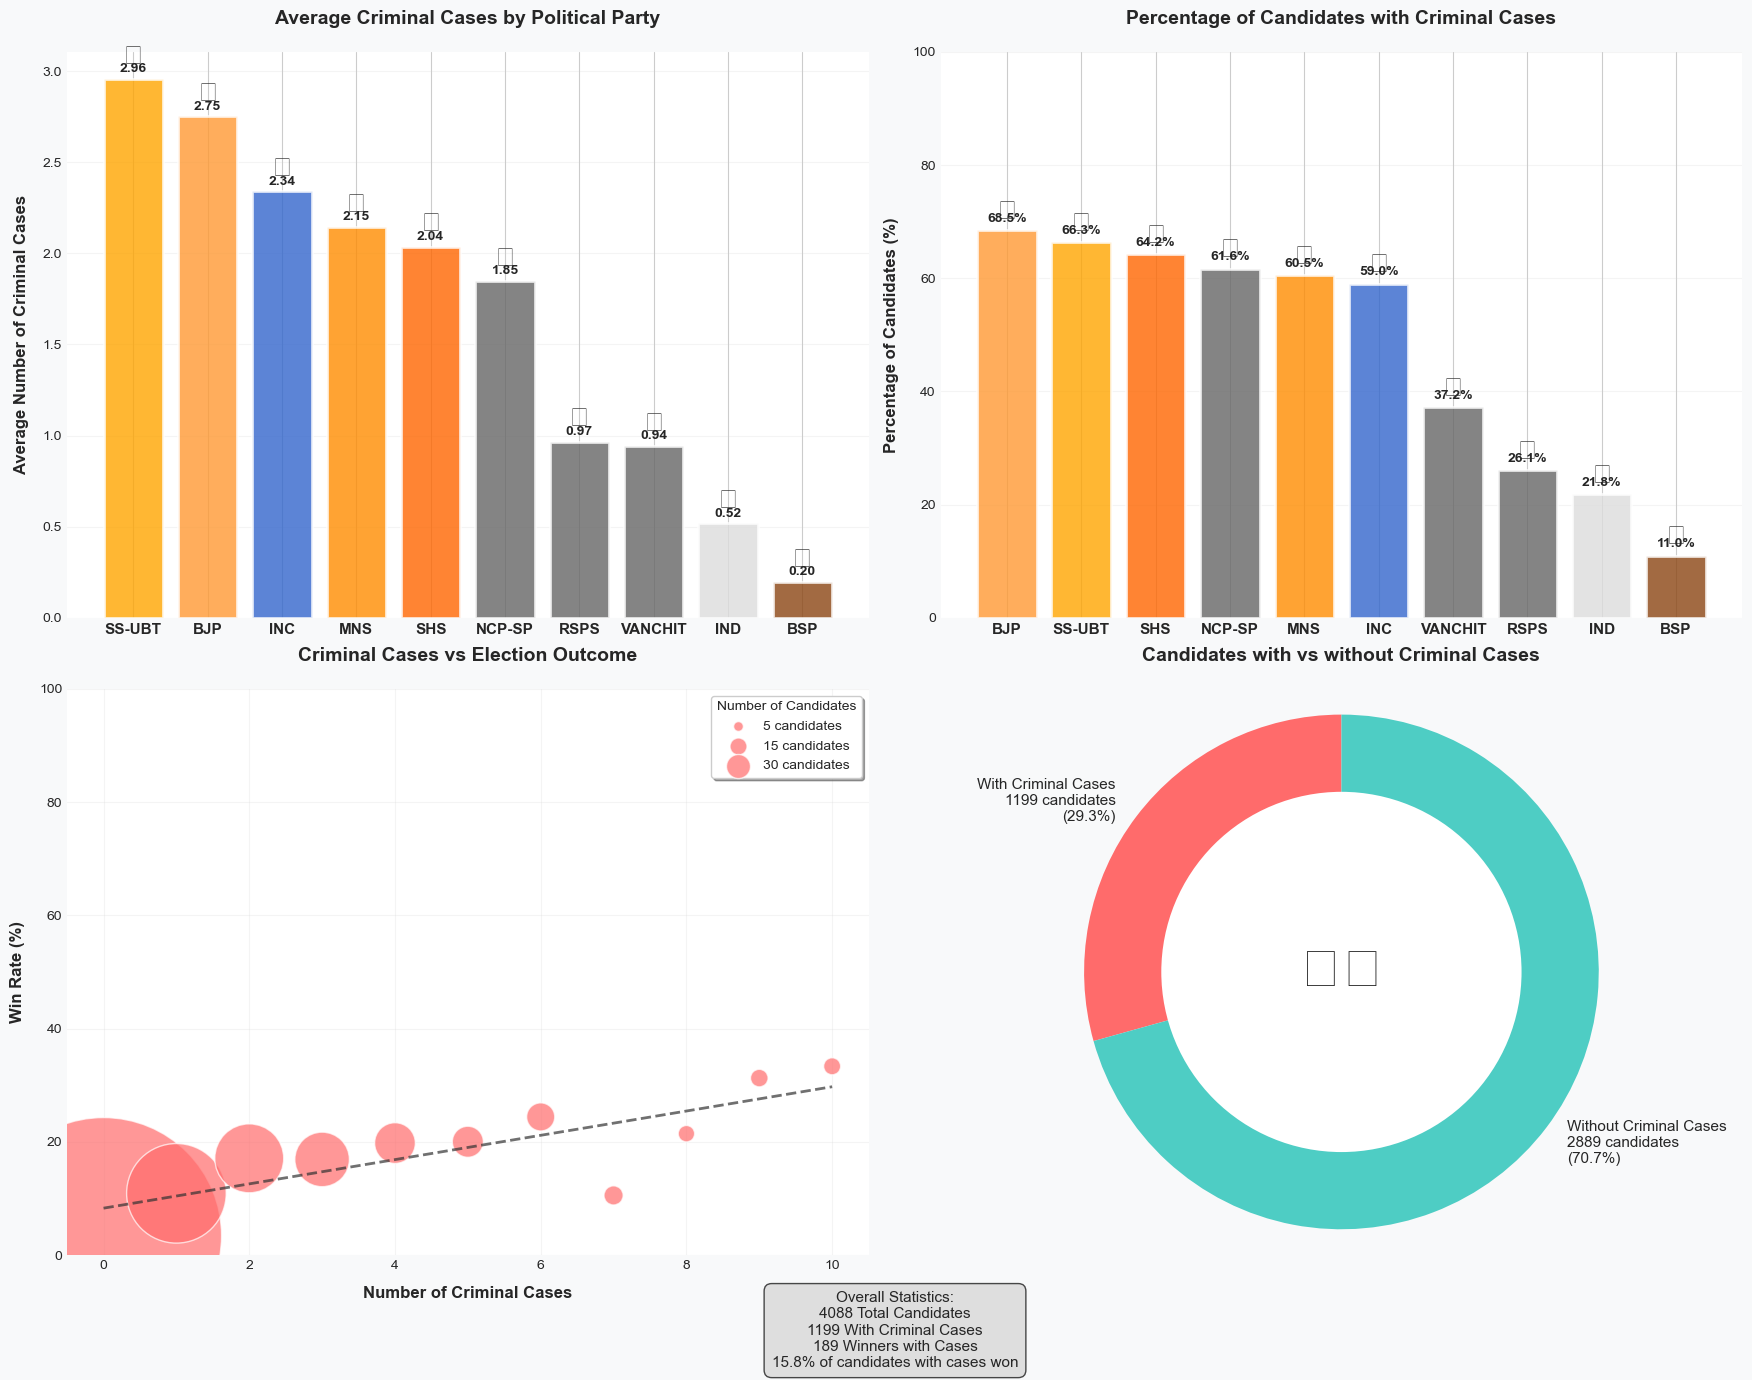


       CRIMINAL CASES ANALYSIS - DETAILED STATISTICS        

Overall Statistics:
Total Candidates: 4088
Candidates with Criminal Cases: 1199 (29.3%)
Winners with Criminal Cases: 189 (15.8% of those with cases)

Party-wise Analysis:
⚪ IND: 447/2050 (21.8%) with cases, 1 winners with cases
🟫 BSP: 26/237 (11.0%) with cases, 0 winners with cases
⚫ VANCHIT: 74/199 (37.2%) with cases, 0 winners with cases
🔸 BJP: 102/149 (68.5%) with cases, 92 winners with cases
🟧 MNS: 75/124 (60.5%) with cases, 0 winners with cases
🟦 INC: 59/100 (59.0%) with cases, 9 winners with cases
🟊 SS-UBT: 63/95 (66.3%) with cases, 13 winners with cases
⚫ RSPS: 24/92 (26.1%) with cases, 1 winners with cases
⚫ NCP-SP: 53/86 (61.6%) with cases, 7 winners with cases
🟠 SHS: 52/81 (64.2%) with cases, 38 winners with cases


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch, Wedge
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

# Set a professional style
plt.style.use('seaborn-v0_8-whitegrid')

# Load the data
df = pd.read_csv('total_cnd_Most_important_final_file_2.csv')

# Data preprocessing
df['Total_Assets_Value'] = pd.to_numeric(df['Total_Assets_Value'], errors='coerce')
df['Liabilities_Value'] = pd.to_numeric(df['Liabilities_Value'], errors='coerce')
df['Net_Worth'] = pd.to_numeric(df['Net_Worth'], errors='coerce')

# Fill NaN values with 0 for financial columns
df['Total_Assets_Value'].fillna(0, inplace=True)
df['Liabilities_Value'].fillna(0, inplace=True)
df['Net_Worth'].fillna(0, inplace=True)

# Create a simplified party column for better visualization
df['Party_Short'] = df['Party_std'].apply(lambda x: x.split()[0] if pd.notna(x) and len(x.split()) > 0 else 'Other')

# Map parties to symbols/emoji (approximate representations)
party_symbols = {
    'BJP': '🔸',  # Saffron color representation
    'SHS': '🟠',  # Shiv Sena - orange
    'INC': '🟦',  # Congress - blue
    'NCP': '🟩',  # NCP - green
    'IND': '⚪',  # Independent - white
    'BSP': '🟫',  # BSP - brown
    'VBA': '🔷',  # Vanchit Bahujan Aaghadi - blue diamond
    'MNS': '🟧',  # MNS - another orange
    'AIMIM': '🟥',  # AIMIM - red
    'SS-UBT': '🟊',  # Shiv Sena UBT - star
    'Other': '⚫'   # Other parties - black
}

# Create a custom color palette based on party symbols
party_colors = {
    'BJP': '#FF9933',  # Saffron
    'SHS': '#FF6600',  # Orange
    'INC': '#3366CC',  # Blue
    'NCP': '#66CC66',  # Green
    'IND': '#DDDDDD',  # Light Gray
    'BSP': '#8B4513',  # SaddleBrown
    'VBA': '#4169E1',  # RoyalBlue
    'MNS': '#FF8C00',  # DarkOrange
    'AIMIM': '#DC143C', # Crimson
    'SS-UBT': '#FFA500', # Orange
    'Other': '#666666'  # Dark Gray
}

# Get the top 10 parties by number of candidates
top_parties = df['Party_Short'].value_counts().head(10).index.tolist()

# Create the visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
fig.patch.set_facecolor('#f8f9fa')  # Light background color

# ===== PLOT 1: Criminal Cases Distribution by Party =====
criminal_cases_by_party = []
for party in top_parties:
    avg_cases = df[df['Party_Short'] == party]['Criminal_Case'].mean()
    criminal_cases_by_party.append((party, avg_cases))

# Sort by average criminal cases
criminal_cases_by_party.sort(key=lambda x: x[1], reverse=True)
parties, avg_cases = zip(*criminal_cases_by_party)

x = np.arange(len(parties))
bars = ax1.bar(x, avg_cases, color=[party_colors.get(p, '#666666') for p in parties], 
               alpha=0.8, edgecolor='white', linewidth=2)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    ax1.text(i, avg_cases[i] + 0.05, symbol, ha='center', va='bottom', 
             fontsize=20, fontweight='bold')

# Customize the chart
ax1.set_ylabel('Average Number of Criminal Cases', fontsize=12, fontweight='bold', labelpad=10)
ax1.set_title('Average Criminal Cases by Political Party', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(parties, fontsize=11, fontweight='bold')
ax1.grid(axis='y', alpha=0.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove chart borders
for spine in ax1.spines.values():
    spine.set_visible(False)

# ===== PLOT 2: Percentage of Candidates with Criminal Cases =====
candidates_with_cases = []
for party in top_parties:
    party_df = df[df['Party_Short'] == party]
    with_cases = len(party_df[party_df['Criminal_Case'] > 0])
    total = len(party_df)
    percentage = (with_cases / total) * 100 if total > 0 else 0
    candidates_with_cases.append((party, percentage))

# Sort by percentage
candidates_with_cases.sort(key=lambda x: x[1], reverse=True)
parties, percentages = zip(*candidates_with_cases)

x = np.arange(len(parties))
bars = ax2.bar(x, percentages, color=[party_colors.get(p, '#666666') for p in parties], 
               alpha=0.8, edgecolor='white', linewidth=2)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    ax2.text(i, percentages[i] + 1, symbol, ha='center', va='bottom', 
             fontsize=20, fontweight='bold')

# Customize the chart
ax2.set_ylabel('Percentage of Candidates (%)', fontsize=12, fontweight='bold', labelpad=10)
ax2.set_title('Percentage of Candidates with Criminal Cases', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(parties, fontsize=11, fontweight='bold')
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove chart borders
for spine in ax2.spines.values():
    spine.set_visible(False)

# ===== PLOT 3: Criminal Cases vs Election Outcome =====
# Prepare data
cases_vs_outcome = df.groupby('Criminal_Case')['Winner_Flag'].mean().reset_index()
cases_vs_outcome = cases_vs_outcome[cases_vs_outcome['Criminal_Case'] <= 10]  # Limit to 10 cases for readability

# Create scatter plot with size based on number of candidates
sizes = []
for cases in cases_vs_outcome['Criminal_Case']:
    count = len(df[df['Criminal_Case'] == cases])
    sizes.append(count * 10)  # Scale for visibility

scatter = ax3.scatter(cases_vs_outcome['Criminal_Case'], cases_vs_outcome['Winner_Flag'] * 100, 
                     s=sizes, alpha=0.7, color='#FF6B6B', edgecolors='white', linewidth=1)

# Add trend line
z = np.polyfit(cases_vs_outcome['Criminal_Case'], cases_vs_outcome['Winner_Flag'] * 100, 1)
p = np.poly1d(z)
ax3.plot(cases_vs_outcome['Criminal_Case'], p(cases_vs_outcome['Criminal_Case']), 
         color='#333333', linestyle='--', alpha=0.7, linewidth=2)

# Customize the chart
ax3.set_xlabel('Number of Criminal Cases', fontsize=12, fontweight='bold', labelpad=10)
ax3.set_ylabel('Win Rate (%)', fontsize=12, fontweight='bold', labelpad=10)
ax3.set_title('Criminal Cases vs Election Outcome', fontsize=14, fontweight='bold', pad=20)
ax3.set_ylim(0, 100)
ax3.grid(alpha=0.2)

# Add size legend
for count in [5, 15, 30]:
    ax3.scatter([], [], s=count*10, alpha=0.7, color='#FF6B6B', edgecolors='white', 
                label=f'{count} candidates')
ax3.legend(scatterpoints=1, frameon=True, fancybox=True, shadow=True, title='Number of Candidates')

# Remove chart borders
for spine in ax3.spines.values():
    spine.set_visible(False)

# ===== PLOT 4: Pie Chart - Candidates with vs without Criminal Cases =====
total_candidates = len(df)
candidates_with_cases = len(df[df['Criminal_Case'] > 0])
candidates_without_cases = total_candidates - candidates_with_cases

# Data for pie chart
sizes = [candidates_with_cases, candidates_without_cases]
colors = ['#FF6B6B', '#4ECDC4']
labels = [f'With Criminal Cases\n{candidates_with_cases} candidates\n({candidates_with_cases/total_candidates*100:.1f}%)', 
          f'Without Criminal Cases\n{candidates_without_cases} candidates\n({candidates_without_cases/total_candidates*100:.1f}%)']

# Create pie chart
wedges, texts, autotexts = ax4.pie(sizes, labels=labels, colors=colors, autopct='', 
                                   startangle=90, textprops={'fontsize': 11})

# Draw circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax4.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax4.axis('equal')
ax4.set_title('Candidates with vs without Criminal Cases', fontsize=14, fontweight='bold', pad=20)

# Add criminal symbol in the center
ax4.text(0, 0, '⚖️', fontsize=40, ha='center', va='center')

# Add overall statistics as text
total_winners_with_cases = len(df[(df['Winner_Flag'] == 1) & (df['Criminal_Case'] > 0)])
winners_with_cases_percentage = (total_winners_with_cases / candidates_with_cases * 100) if candidates_with_cases > 0 else 0

stats_text = f"Overall Statistics:\n{total_candidates} Total Candidates\n{candidates_with_cases} With Criminal Cases\n{total_winners_with_cases} Winners with Cases\n{winners_with_cases_percentage:.1f}% of candidates with cases won"
fig.text(0.5, 0.02, stats_text, fontsize=11, ha='center', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Make room for the statistics text
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("CRIMINAL CASES ANALYSIS - DETAILED STATISTICS".center(60))
print("="*60)

print(f"\nOverall Statistics:")
print(f"Total Candidates: {total_candidates}")
print(f"Candidates with Criminal Cases: {candidates_with_cases} ({candidates_with_cases/total_candidates*100:.1f}%)")
print(f"Winners with Criminal Cases: {total_winners_with_cases} ({total_winners_with_cases/candidates_with_cases*100:.1f}% of those with cases)")

print(f"\nParty-wise Analysis:")
for party in top_parties:
    party_df = df[df['Party_Short'] == party]
    total = len(party_df)
    with_cases = len(party_df[party_df['Criminal_Case'] > 0])
    winners_with_cases = len(party_df[(party_df['Winner_Flag'] == 1) & (party_df['Criminal_Case'] > 0)])
    
    percentage_with_cases = (with_cases / total * 100) if total > 0 else 0
    percentage_winners = (winners_with_cases / with_cases * 100) if with_cases > 0 else 0
    
    print(f"{party_symbols.get(party, '⚫')} {party}: {with_cases}/{total} ({percentage_with_cases:.1f}%) with cases, {winners_with_cases} winners with cases")

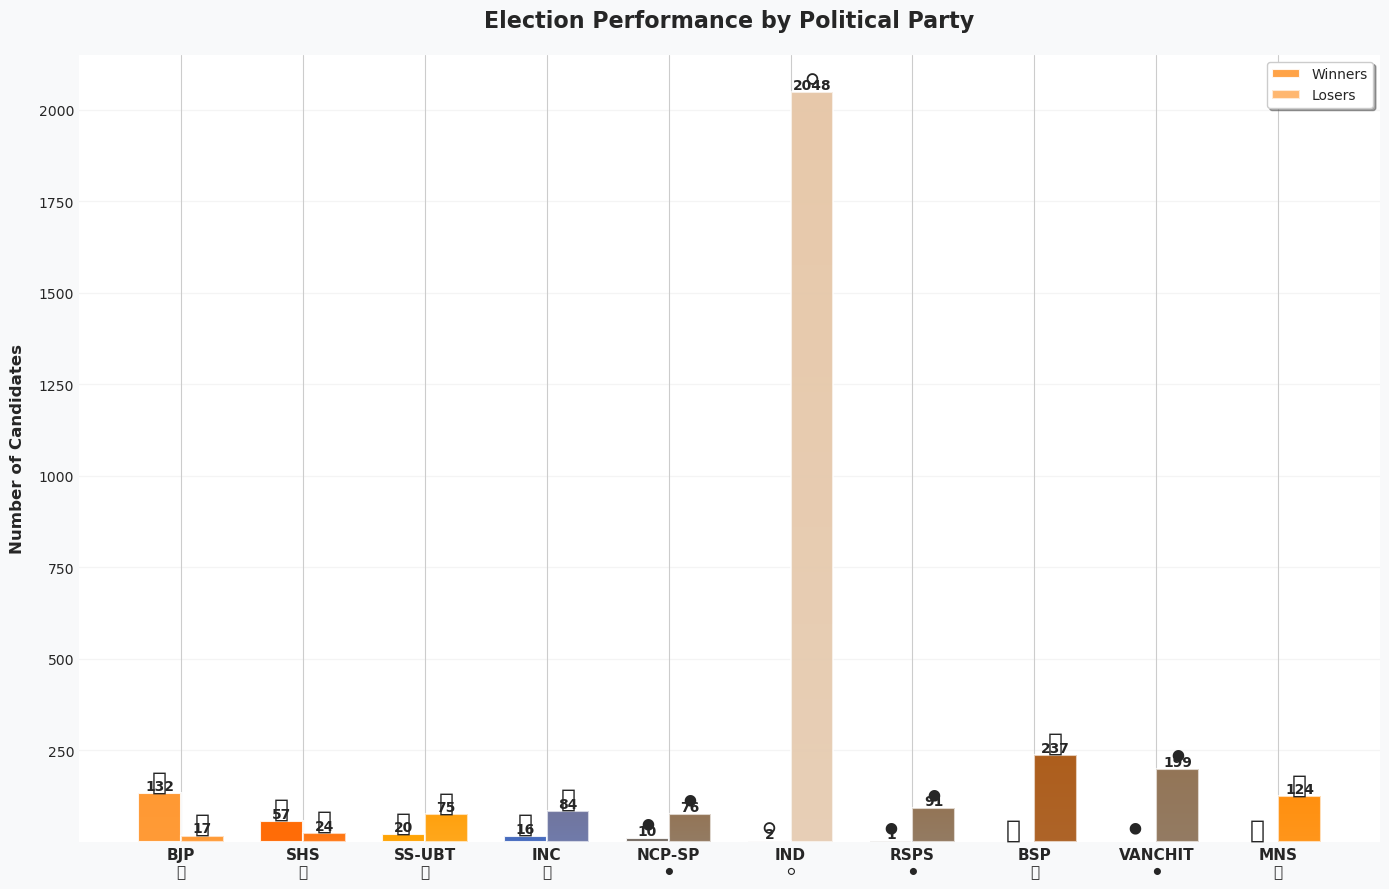

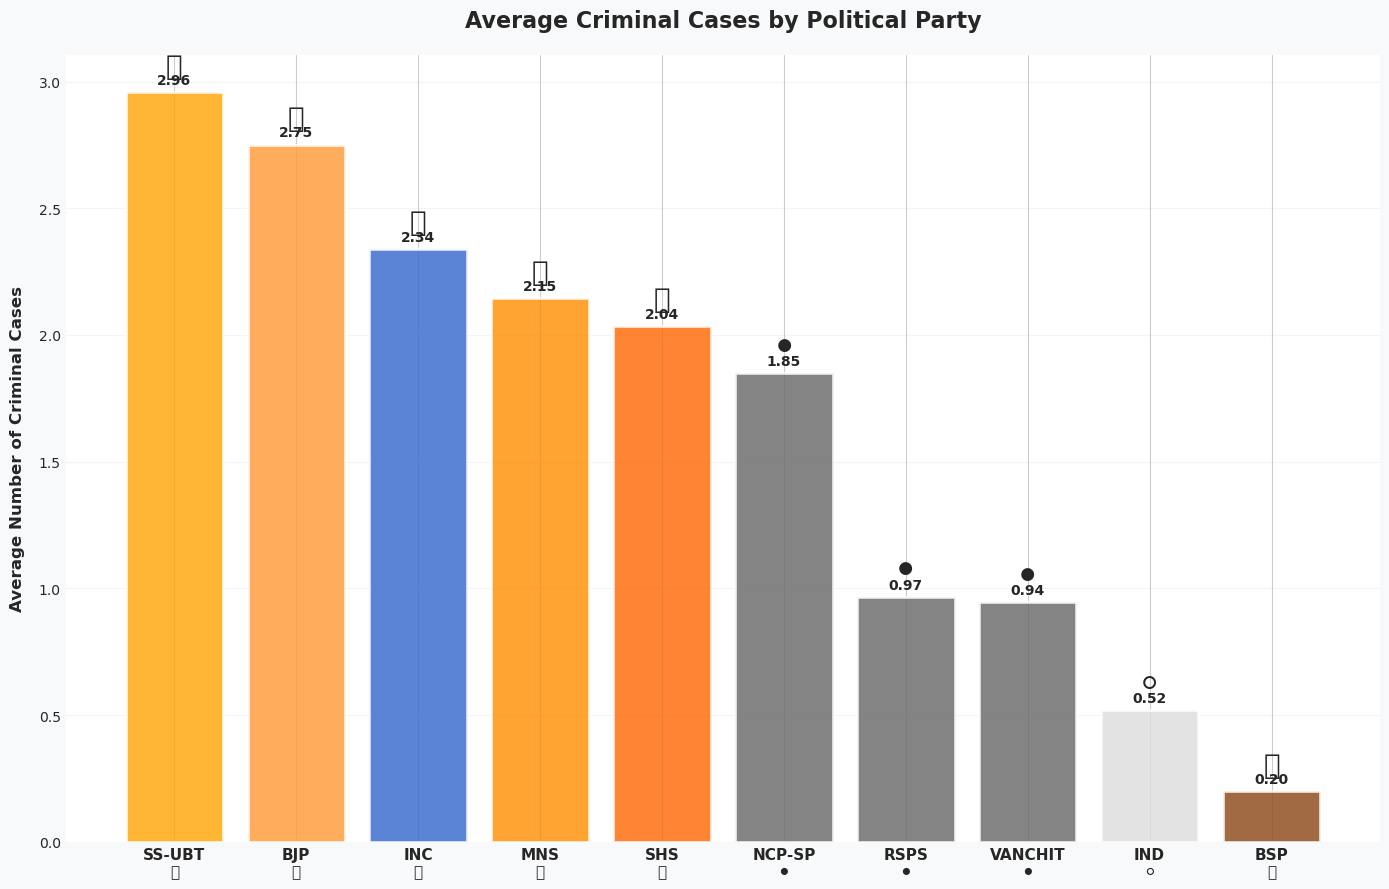

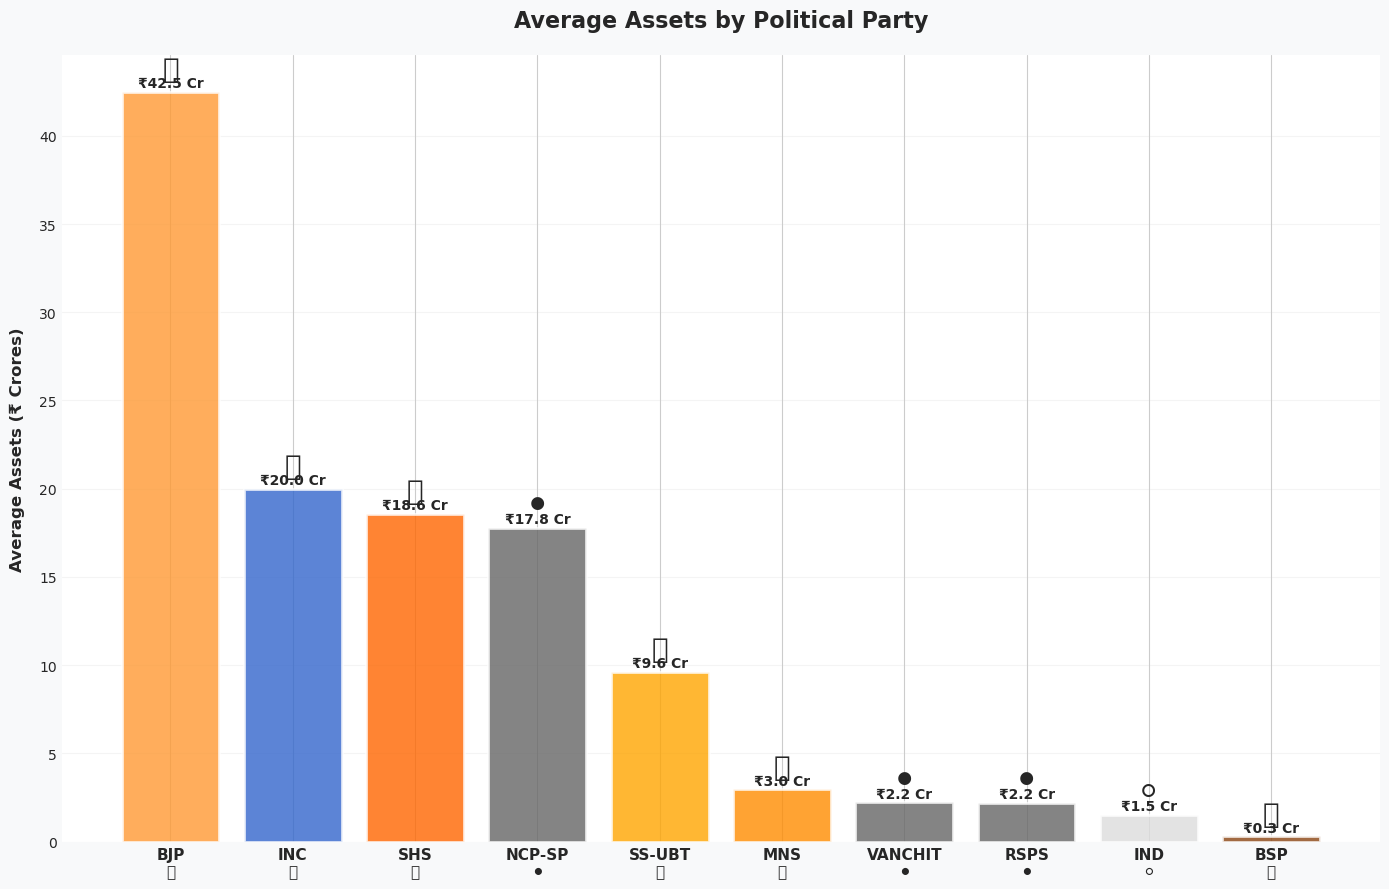

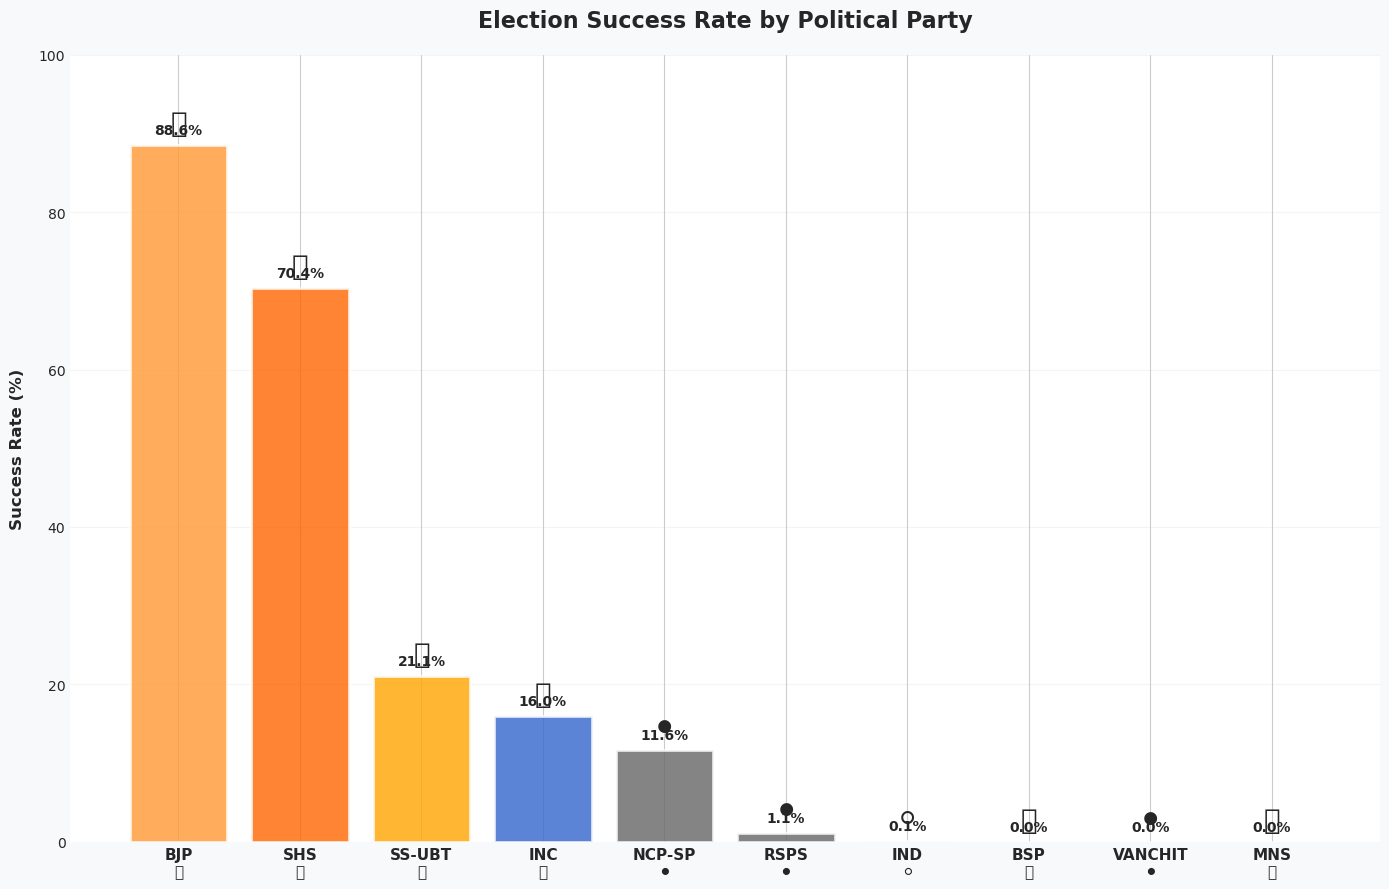

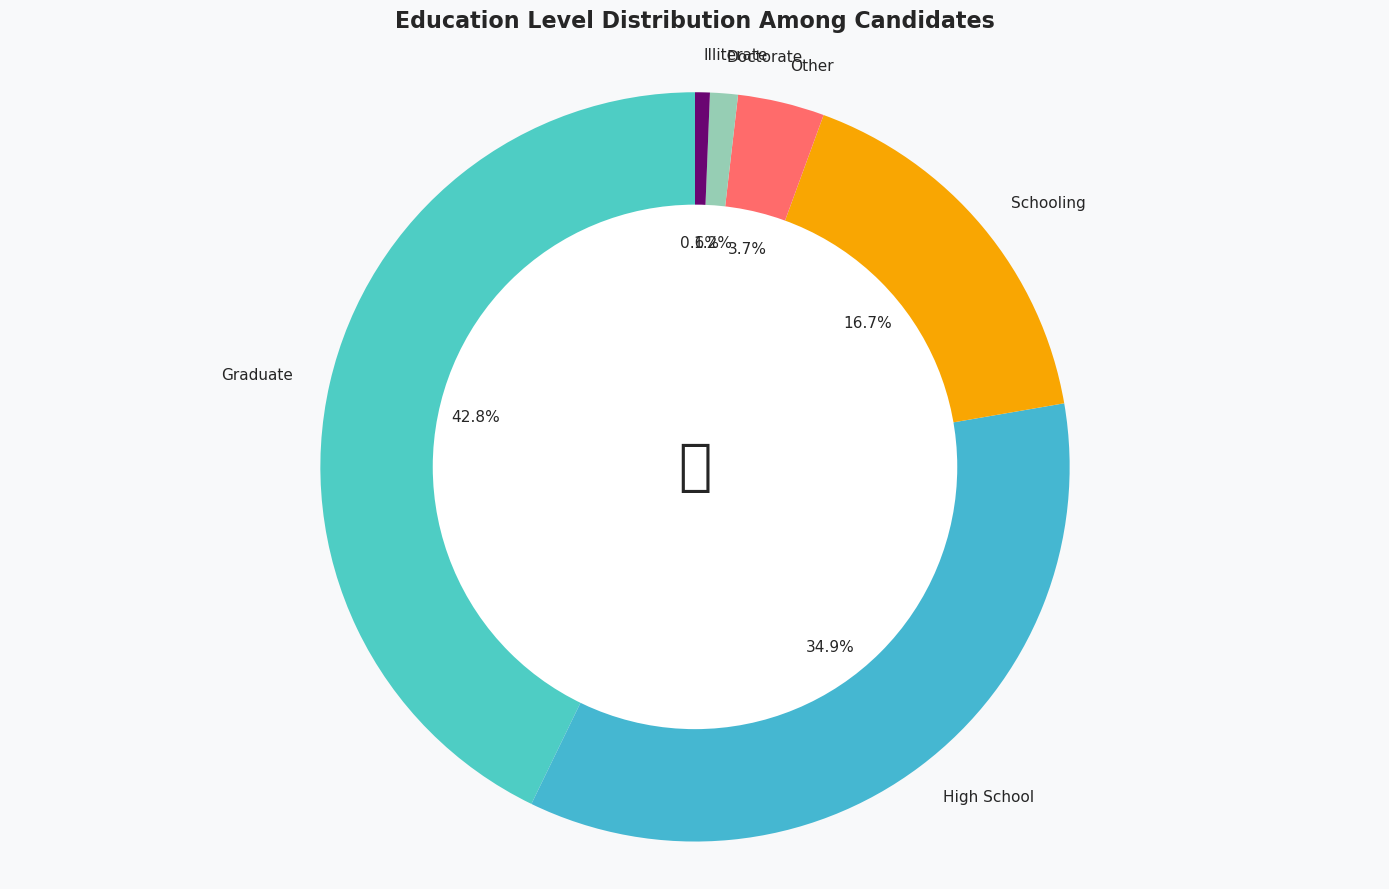

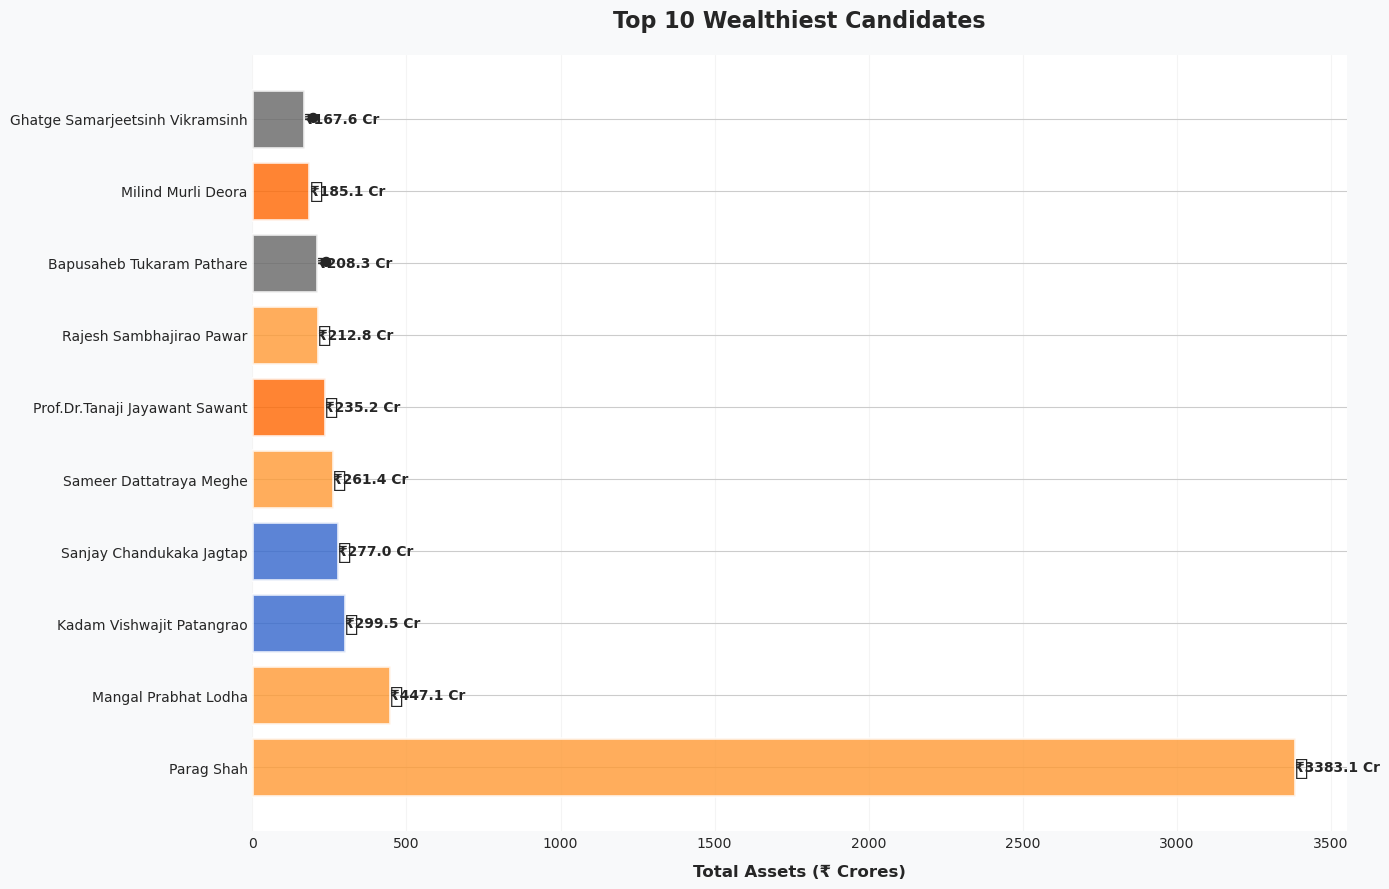

                   ELECTION DATA SUMMARY STATISTICS                   

Overall Statistics:
Total Candidates: 4088
Total Winners: 288 (7.0%)
Candidates with Criminal Cases: 1199 (29.3%)
Winners with Criminal Cases: 189 (15.8% of those with cases)

Party Symbols Legend:
🔸 : BJP
🟠 : SHS
🟦 : INC
⚪ : IND
🟫 : BSP
🟧 : MNS
🟊 : SS-UBT

Wealth Statistics:
Average Assets: ₹4.50 Crores
Median Assets: ₹0.05 Crores
Maximum Assets: ₹3383.06 Crores


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch, Wedge, FancyBboxPatch
import matplotlib as mpl

# Set a professional style
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Load the data
df = pd.read_csv('total_cnd_Most_important_final_file_2.csv')

# Data preprocessing
df['Total_Assets_Value'] = pd.to_numeric(df['Total_Assets_Value'], errors='coerce')
df['Liabilities_Value'] = pd.to_numeric(df['Liabilities_Value'], errors='coerce')
df['Net_Worth'] = pd.to_numeric(df['Net_Worth'], errors='coerce')

# Fill NaN values with 0 for financial columns
df['Total_Assets_Value'].fillna(0, inplace=True)
df['Liabilities_Value'].fillna(0, inplace=True)
df['Net_Worth'].fillna(0, inplace=True)

# Create a simplified party column for better visualization
df['Party_Short'] = df['Party_std'].apply(lambda x: x.split()[0] if pd.notna(x) and len(x.split()) > 0 else 'Other')

# Map parties to symbols/emoji (approximate representations)
party_symbols = {
    'BJP': '🔸',  # Saffron color representation
    'SHS': '🟠',  # Shiv Sena - orange
    'INC': '🟦',  # Congress - blue
    'NCP': '🟩',  # NCP - green
    'IND': '⚪',  # Independent - white
    'BSP': '🟫',  # BSP - brown
    'VBA': '🔷',  # Vanchit Bahujan Aaghadi - blue diamond
    'MNS': '🟧',  # MNS - another orange
    'AIMIM': '🟥',  # AIMIM - red
    'SS-UBT': '🟊',  # Shiv Sena UBT - star
    'Other': '⚫'   # Other parties - black
}

# Create a custom color palette based on party symbols
party_colors = {
    'BJP': '#FF9933',  # Saffron
    'SHS': '#FF6600',  # Orange
    'INC': '#3366CC',  # Blue
    'NCP': '#66CC66',  # Green
    'IND': '#DDDDDD',  # Light Gray
    'BSP': '#8B4513',  # SaddleBrown
    'VBA': '#4169E1',  # RoyalBlue
    'MNS': '#FF8C00',  # DarkOrange
    'AIMIM': '#DC143C', # Crimson
    'SS-UBT': '#FFA500', # Orange
    'Other': '#666666'  # Dark Gray
}

# Get the top 10 parties by number of candidates
top_parties = df['Party_Short'].value_counts().head(10).index.tolist()

# =============================================================================
# VISUALIZATION 1: ELECTION PERFORMANCE BY PARTY
# =============================================================================
plt.figure(figsize=(14, 9))
plt.gcf().patch.set_facecolor('#f8f9fa')

# Get data for winners and losers by party
party_data = []
for party in top_parties:
    party_winners = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 1)])
    party_losers = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 0)])
    party_data.append((party, party_winners, party_losers))

# Sort by number of winners
party_data.sort(key=lambda x: x[1], reverse=True)
parties, winners, losers = zip(*party_data)

x = np.arange(len(parties))
width = 0.35

# Create gradient bars
def create_gradient_bar(ax, x, height, width, color):
    for i, h in enumerate(height):
        if h > 0:
            gradient = np.linspace(0.8, 1.0, 100)
            for j in range(100):
                alpha = gradient[j]
                ax.bar(x[i], h/100, width, color=color, alpha=alpha, 
                       bottom=j*(h/100), edgecolor=None)

# Create bars with gradient effect
create_gradient_bar(plt.gca(), x - width/2, winners, width, [party_colors.get(p, '#666666') for p in parties])
create_gradient_bar(plt.gca(), x + width/2, losers, width, [party_colors.get(p, '#666666') for p in parties])

# Add outline to bars
bars1 = plt.bar(x - width/2, winners, width, label='Winners', 
                color=[party_colors.get(p, '#666666') for p in parties], 
                alpha=0.9, edgecolor='white', linewidth=1.5)
bars2 = plt.bar(x + width/2, losers, width, label='Losers', 
                color=[party_colors.get(p, '#666666') for p in parties], 
                alpha=0.7, edgecolor='white', linewidth=1.5)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    plt.text(i - width/2, winners[i] + 0.5, symbol, ha='center', va='bottom', 
             fontsize=18, fontweight='bold')
    plt.text(i + width/2, losers[i] + 0.5, symbol, ha='center', va='bottom', 
             fontsize=18, fontweight='bold')

# Customize the chart
plt.ylabel('Number of Candidates', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Election Performance by Political Party', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, [f"{p}\n{party_symbols.get(p, '⚫')}" for p in parties], fontsize=11, fontweight='bold')
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add a light grid for better readability
plt.grid(axis='y', alpha=0.2, linestyle='-', linewidth=1)
plt.gca().set_axisbelow(True)

# Remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 2: CRIMINAL CASES ANALYSIS
# =============================================================================
plt.figure(figsize=(14, 9))
plt.gcf().patch.set_facecolor('#f8f9fa')

# Prepare data
criminal_cases_by_party = []
for party in top_parties:
    avg_cases = df[df['Party_Short'] == party]['Criminal_Case'].mean()
    criminal_cases_by_party.append((party, avg_cases))

# Sort by average criminal cases
criminal_cases_by_party.sort(key=lambda x: x[1], reverse=True)
parties, avg_cases = zip(*criminal_cases_by_party)

x = np.arange(len(parties))
bars = plt.bar(x, avg_cases, color=[party_colors.get(p, '#666666') for p in parties], 
               alpha=0.8, edgecolor='white', linewidth=2)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    plt.text(i, avg_cases[i] + 0.05, symbol, ha='center', va='bottom', 
             fontsize=20, fontweight='bold')

# Customize the chart
plt.ylabel('Average Number of Criminal Cases', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Average Criminal Cases by Political Party', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, [f"{p}\n{party_symbols.get(p, '⚫')}" for p in parties], fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 3: FINANCIAL ANALYSIS - ASSETS BY PARTY
# =============================================================================
plt.figure(figsize=(14, 9))
plt.gcf().patch.set_facecolor('#f8f9fa')

# Prepare data - convert to crores for better readability
assets_by_party = []
for party in top_parties:
    avg_assets = df[df['Party_Short'] == party]['Total_Assets_Value'].mean() / 10000000  # Convert to crores
    assets_by_party.append((party, avg_assets))

# Sort by average assets
assets_by_party.sort(key=lambda x: x[1], reverse=True)
parties, avg_assets = zip(*assets_by_party)

x = np.arange(len(parties))
bars = plt.bar(x, avg_assets, color=[party_colors.get(p, '#666666') for p in parties], 
               alpha=0.8, edgecolor='white', linewidth=2)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    plt.text(i, avg_assets[i] + 0.5, symbol, ha='center', va='bottom', 
             fontsize=20, fontweight='bold')

# Customize the chart
plt.ylabel('Average Assets (₹ Crores)', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Average Assets by Political Party', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, [f"{p}\n{party_symbols.get(p, '⚫')}" for p in parties], fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'₹{height:.1f} Cr', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 4: SUCCESS RATE BY PARTY
# =============================================================================
plt.figure(figsize=(14, 9))
plt.gcf().patch.set_facecolor('#f8f9fa')

# Prepare data
success_rates = []
for party in top_parties:
    total = len(df[df['Party_Short'] == party])
    wins = len(df[(df['Party_Short'] == party) & (df['Winner_Flag'] == 1)])
    success_rate = (wins / total) * 100 if total > 0 else 0
    success_rates.append((party, success_rate))

# Sort by success rate
success_rates.sort(key=lambda x: x[1], reverse=True)
parties, rates = zip(*success_rates)

x = np.arange(len(parties))
bars = plt.bar(x, rates, color=[party_colors.get(p, '#666666') for p in parties], 
               alpha=0.8, edgecolor='white', linewidth=2)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    plt.text(i, rates[i] + 1, symbol, ha='center', va='bottom', 
             fontsize=20, fontweight='bold')

# Customize the chart
plt.ylabel('Success Rate (%)', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Election Success Rate by Political Party', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, [f"{p}\n{party_symbols.get(p, '⚫')}" for p in parties], fontsize=11, fontweight='bold')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.2)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 5: EDUCATION LEVEL ANALYSIS
# =============================================================================
plt.figure(figsize=(14, 9))
plt.gcf().patch.set_facecolor('#f8f9fa')

# Create a function to categorize education levels
def categorize_education(edu):
    if pd.isna(edu):
        return 'Not Specified'
    edu = str(edu).lower()
    if 'illiterate' in edu:
        return 'Illiterate'
    elif 'literate' in edu or '5th' in edu or '8th' in edu:
        return 'Schooling'
    elif '10th' in edu or '12th' in edu:
        return 'High School'
    elif 'graduate' in edu:
        return 'Graduate'
    elif 'post graduate' in edu:
        return 'Post Graduate'
    elif 'professional' in edu:
        return 'Professional'
    elif 'doctorate' in edu:
        return 'Doctorate'
    else:
        return 'Other'

df['Education_Category'] = df['Education'].apply(categorize_education)

# Prepare data
education_dist = df['Education_Category'].value_counts()

# Create a custom color palette for education levels
education_colors = ['#4ECDC4', '#45B7D1', '#F9A602', '#FF6B6B', '#96CEB4', '#6A0572', '#FFEAA7', '#DDA0DD']

# Create pie chart
wedges, texts, autotexts = plt.pie(education_dist.values, labels=education_dist.index, 
                                   colors=education_colors, autopct='%1.1f%%', 
                                   startangle=90, textprops={'fontsize': 11})

# Draw circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Education Level Distribution Among Candidates', fontsize=16, fontweight='bold', pad=20)

# Add education symbol in the center
plt.text(0, 0, '🎓', fontsize=40, ha='center', va='center')

plt.tight_layout()
plt.show()

# =============================================================================
# VISUALIZATION 6: TOP 10 WEALTHIEST CANDIDATES
# =============================================================================
plt.figure(figsize=(14, 9))
plt.gcf().patch.set_facecolor('#f8f9fa')

# Prepare data - get top 10 wealthiest candidates
top_wealthy = df.nlargest(10, 'Total_Assets_Value')[['Candidate', 'Total_Assets_Value', 'Party_Short']]
top_wealthy['Assets_Cr'] = top_wealthy['Total_Assets_Value'] / 10000000  # Convert to crores

# Create horizontal bar chart
y_pos = np.arange(len(top_wealthy))
bars = plt.barh(y_pos, top_wealthy['Assets_Cr'], 
                color=[party_colors.get(p, '#666666') for p in top_wealthy['Party_Short']], 
                alpha=0.8, edgecolor='white', linewidth=2)

# Add party symbols
for i, (_, row) in enumerate(top_wealthy.iterrows()):
    symbol = party_symbols.get(row['Party_Short'], '⚫')
    plt.text(row['Assets_Cr'] + 0.5, i, symbol, ha='left', va='center', 
             fontsize=16, fontweight='bold')

# Customize the chart
plt.xlabel('Total Assets (₹ Crores)', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Top 10 Wealthiest Candidates', fontsize=16, fontweight='bold', pad=20)
plt.yticks(y_pos, top_wealthy['Candidate'], fontsize=10)
plt.grid(axis='x', alpha=0.2)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
            f'₹{width:.1f} Cr', ha='left', va='center', fontsize=10, fontweight='bold')

# Remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*70)
print("ELECTION DATA SUMMARY STATISTICS".center(70))
print("="*70)

total_candidates = len(df)
total_winners = df['Winner_Flag'].sum()
candidates_with_cases = len(df[df['Criminal_Case'] > 0])
winners_with_cases = len(df[(df['Winner_Flag'] == 1) & (df['Criminal_Case'] > 0)])

print(f"\nOverall Statistics:")
print(f"Total Candidates: {total_candidates}")
print(f"Total Winners: {total_winners} ({total_winners/total_candidates*100:.1f}%)")
print(f"Candidates with Criminal Cases: {candidates_with_cases} ({candidates_with_cases/total_candidates*100:.1f}%)")
print(f"Winners with Criminal Cases: {winners_with_cases} ({winners_with_cases/candidates_with_cases*100:.1f}% of those with cases)")

print(f"\nParty Symbols Legend:")
for party, symbol in party_symbols.items():
    if party in top_parties:
        print(f"{symbol} : {party}")

print(f"\nWealth Statistics:")
print(f"Average Assets: ₹{df['Total_Assets_Value'].mean()/10000000:.2f} Crores")
print(f"Median Assets: ₹{df['Total_Assets_Value'].median()/10000000:.2f} Crores")
print(f"Maximum Assets: ₹{df['Total_Assets_Value'].max()/10000000:.2f} Crores")

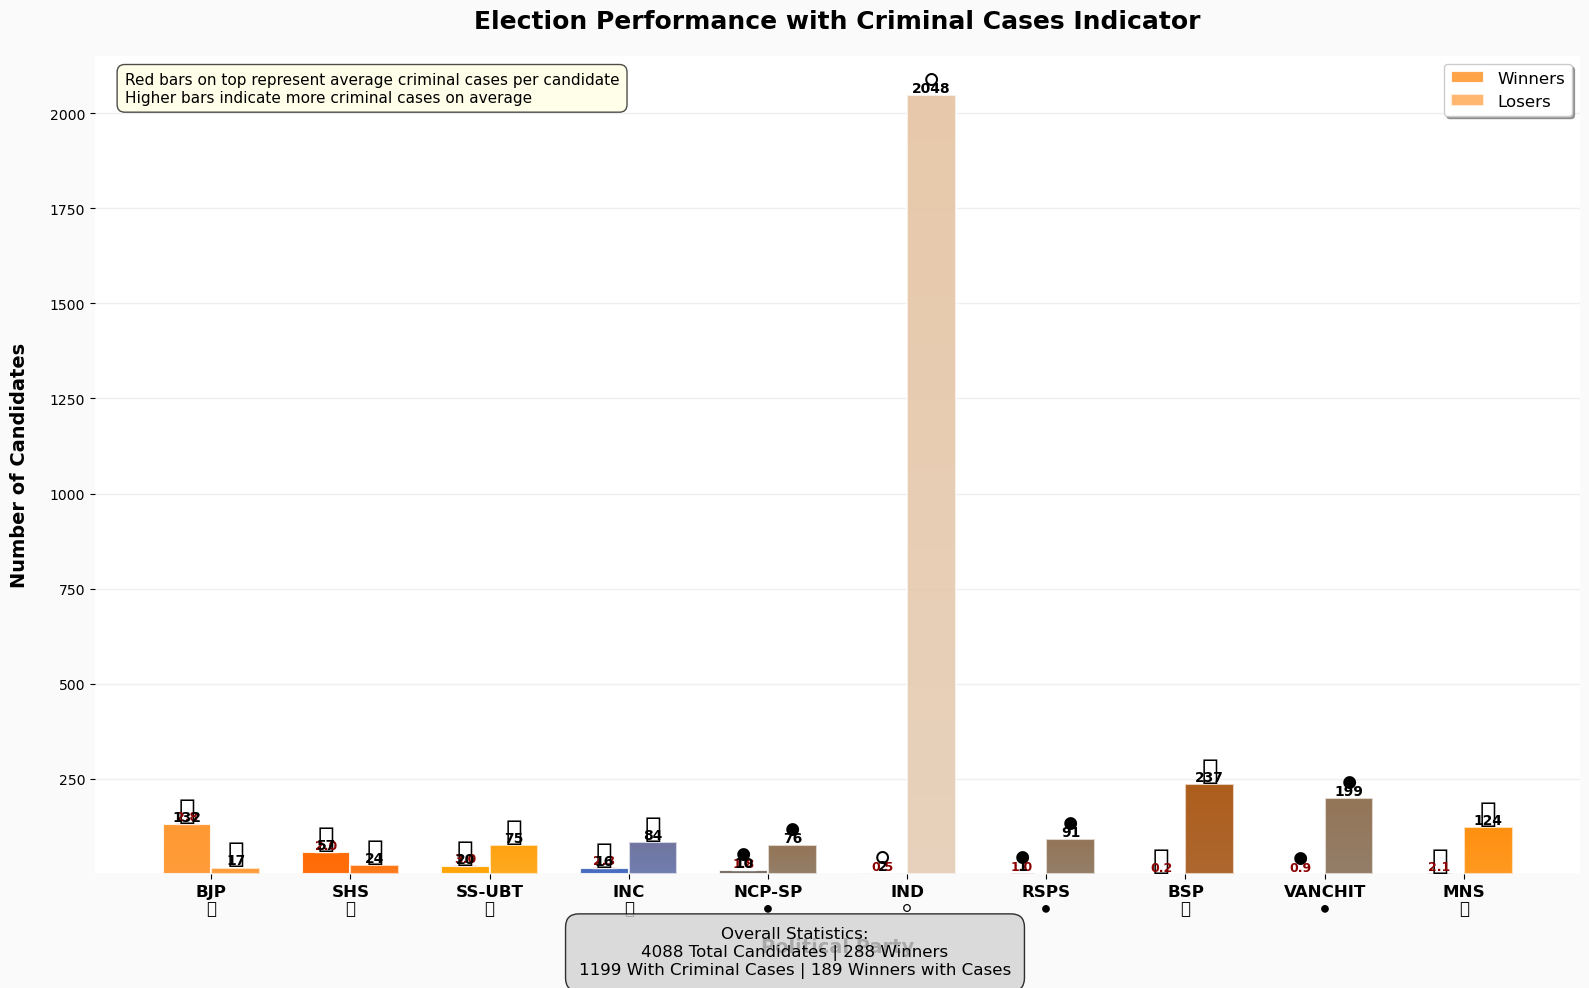


          ELECTION PERFORMANCE WITH CRIMINAL CASES ANALYSIS           

Overall Statistics:
Total Candidates: 4088
Winners: 288 (7.0% success rate)
Candidates with Criminal Cases: 1199 (29.3%)
Winners with Criminal Cases: 189 (15.8% of those with cases)

Party-wise Performance:
🔸 BJP: 132/149 winners (88.6%) | 2.75 avg cases | 102/149 with cases (68.5%)
🟠 SHS: 57/81 winners (70.4%) | 2.04 avg cases | 52/81 with cases (64.2%)
🟊 SS-UBT: 20/95 winners (21.1%) | 2.96 avg cases | 63/95 with cases (66.3%)
🟦 INC: 16/100 winners (16.0%) | 2.34 avg cases | 59/100 with cases (59.0%)
⚫ NCP-SP: 10/86 winners (11.6%) | 1.85 avg cases | 53/86 with cases (61.6%)
⚪ IND: 2/2050 winners (0.1%) | 0.52 avg cases | 447/2050 with cases (21.8%)
⚫ RSPS: 1/92 winners (1.1%) | 0.97 avg cases | 24/92 with cases (26.1%)
🟫 BSP: 0/237 winners (0.0%) | 0.20 avg cases | 26/237 with cases (11.0%)
⚫ VANCHIT: 0/199 winners (0.0%) | 0.94 avg cases | 74/199 with cases (37.2%)
🟧 MNS: 0/124 winners (0.0%) | 2.15 avg cases 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch, Wedge, FancyBboxPatch
import matplotlib as mpl

# Set a professional style
plt.style.use('default')
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Load the data
df = pd.read_csv('total_cnd_Most_important_final_file_2.csv')

# Data preprocessing
df['Total_Assets_Value'] = pd.to_numeric(df['Total_Assets_Value'], errors='coerce')
df['Liabilities_Value'] = pd.to_numeric(df['Liabilities_Value'], errors='coerce')
df['Net_Worth'] = pd.to_numeric(df['Net_Worth'], errors='coerce')

# Fill NaN values with 0 for financial columns
df['Total_Assets_Value'].fillna(0, inplace=True)
df['Liabilities_Value'].fillna(0, inplace=True)
df['Net_Worth'].fillna(0, inplace=True)

# Create a simplified party column for better visualization
df['Party_Short'] = df['Party_std'].apply(lambda x: x.split()[0] if pd.notna(x) and len(x.split()) > 0 else 'Other')

# Map parties to symbols/emoji (approximate representations)
party_symbols = {
    'BJP': '🔸',  # Saffron color representation
    'SHS': '🟠',  # Shiv Sena - orange
    'INC': '🟦',  # Congress - blue
    'NCP': '🟩',  # NCP - green
    'IND': '⚪',  # Independent - white
    'BSP': '🟫',  # BSP - brown
    'VBA': '🔷',  # Vanchit Bahujan Aaghadi - blue diamond
    'MNS': '🟧',  # MNS - another orange
    'AIMIM': '🟥',  # AIMIM - red
    'SS-UBT': '🟊',  # Shiv Sena UBT - star
    'Other': '⚫'   # Other parties - black
}

# Create a custom color palette based on party symbols
party_colors = {
    'BJP': '#FF9933',  # Saffron
    'SHS': '#FF6600',  # Orange
    'INC': '#3366CC',  # Blue
    'NCP': '#66CC66',  # Green
    'IND': '#DDDDDD',  # Light Gray
    'BSP': '#8B4513',  # SaddleBrown
    'VBA': '#4169E1',  # RoyalBlue
    'MNS': '#FF8C00',  # DarkOrange
    'AIMIM': '#DC143C', # Crimson
    'SS-UBT': '#FFA500', # Orange
    'Other': '#666666'  # Dark Gray
}

# Get the top 10 parties by number of candidates
top_parties = df['Party_Short'].value_counts().head(10).index.tolist()

# Create a single comprehensive visualization
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('#fafafa')  # Light background color

# Prepare data for the visualization
party_data = []
for party in top_parties:
    party_df = df[df['Party_Short'] == party]
    total_candidates = len(party_df)
    winners = len(party_df[party_df['Winner_Flag'] == 1])
    losers = total_candidates - winners
    avg_criminal_cases = party_df['Criminal_Case'].mean()
    candidates_with_cases = len(party_df[party_df['Criminal_Case'] > 0])
    
    party_data.append({
        'party': party,
        'total': total_candidates,
        'winners': winners,
        'losers': losers,
        'avg_cases': avg_criminal_cases,
        'with_cases': candidates_with_cases,
        'success_rate': (winners / total_candidates) * 100 if total_candidates > 0 else 0,
        'cases_percentage': (candidates_with_cases / total_candidates) * 100 if total_candidates > 0 else 0
    })

# Sort by number of winners
party_data.sort(key=lambda x: x['winners'], reverse=True)

# Extract data for plotting
parties = [d['party'] for d in party_data]
winners = [d['winners'] for d in party_data]
losers = [d['losers'] for d in party_data]
avg_cases = [d['avg_cases'] for d in party_data]
cases_percentage = [d['cases_percentage'] for d in party_data]

# Set up the plot
x = np.arange(len(parties))
width = 0.35

# Create gradient bars for winners and losers
def create_gradient_bar(ax, x, height, width, color):
    for i, h in enumerate(height):
        if h > 0:
            gradient = np.linspace(0.7, 1.0, 100)
            for j in range(100):
                alpha = gradient[j]
                ax.bar(x[i], h/100, width, color=color, alpha=alpha, 
                       bottom=j*(h/100), edgecolor=None)

# Create bars with gradient effect
create_gradient_bar(ax, x - width/2, winners, width, [party_colors.get(p, '#666666') for p in parties])
create_gradient_bar(ax, x + width/2, losers, width, [party_colors.get(p, '#666666') for p in parties])

# Add outline to bars
bars1 = ax.bar(x - width/2, winners, width, label='Winners', 
               color=[party_colors.get(p, '#666666') for p in parties], 
               alpha=0.9, edgecolor='white', linewidth=1.5)
bars2 = ax.bar(x + width/2, losers, width, label='Losers', 
               color=[party_colors.get(p, '#666666') for p in parties], 
               alpha=0.7, edgecolor='white', linewidth=1.5)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    ax.text(i - width/2, winners[i] + 0.5, symbol, ha='center', va='bottom', 
            fontsize=20, fontweight='bold')
    ax.text(i + width/2, losers[i] + 0.5, symbol, ha='center', va='bottom', 
            fontsize=20, fontweight='bold')

# Add criminal case indicators as small bars on top of the main bars
for i, (party, cases) in enumerate(zip(parties, avg_cases)):
    if cases > 0:
        # Scale the case indicator to be proportional but visible
        case_indicator_height = min(5, cases * 0.8)
        ax.bar(i - width/2, case_indicator_height, width/2, 
               bottom=winners[i], color='#8B0000', alpha=0.8, edgecolor='white')
        ax.text(i - width/2, winners[i] + case_indicator_height + 0.3, 
                f'{cases:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold', color='#8B0000')

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the chart
ax.set_ylabel('Number of Candidates', fontsize=14, fontweight='bold', labelpad=15)
ax.set_xlabel('Political Party', fontsize=14, fontweight='bold', labelpad=15)
ax.set_title('Election Performance with Criminal Cases Indicator', fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([f"{p}\n{party_symbols.get(p, '⚫')}" for p in parties], fontsize=12, fontweight='bold')
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=12)

# Add a light grid for better readability
ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=1)
ax.set_axisbelow(True)

# Remove chart borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Add a subtle horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=0.8, alpha=0.3)

# Add explanatory text
explanation_text = "Red bars on top represent average criminal cases per candidate\nHigher bars indicate more criminal cases on average"
ax.text(0.02, 0.98, explanation_text, transform=ax.transAxes, fontsize=11, 
        verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.7))

# Add overall statistics
total_candidates = len(df)
total_winners = df['Winner_Flag'].sum()
candidates_with_cases = len(df[df['Criminal_Case'] > 0])
winners_with_cases = len(df[(df['Winner_Flag'] == 1) & (df['Criminal_Case'] > 0)])

stats_text = f"Overall Statistics:\n{total_candidates} Total Candidates | {total_winners} Winners\n{candidates_with_cases} With Criminal Cases | {winners_with_cases} Winners with Cases"
fig.text(0.5, 0.02, stats_text, fontsize=12, ha='center', 
         bbox=dict(boxstyle="round,pad=0.8", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Make room for the statistics text
plt.show()

# Print detailed statistics
print("\n" + "="*70)
print("ELECTION PERFORMANCE WITH CRIMINAL CASES ANALYSIS".center(70))
print("="*70)

print(f"\nOverall Statistics:")
print(f"Total Candidates: {total_candidates}")
print(f"Winners: {total_winners} ({total_winners/total_candidates*100:.1f}% success rate)")
print(f"Candidates with Criminal Cases: {candidates_with_cases} ({candidates_with_cases/total_candidates*100:.1f}%)")
print(f"Winners with Criminal Cases: {winners_with_cases} ({winners_with_cases/candidates_with_cases*100:.1f}% of those with cases)")

print(f"\nParty-wise Performance:")
for data in party_data:
    party = data['party']
    print(f"{party_symbols.get(party, '⚫')} {party}: {data['winners']}/{data['total']} winners " +
          f"({data['success_rate']:.1f}%) | {data['avg_cases']:.2f} avg cases | " +
          f"{data['with_cases']}/{data['total']} with cases ({data['cases_percentage']:.1f}%)")

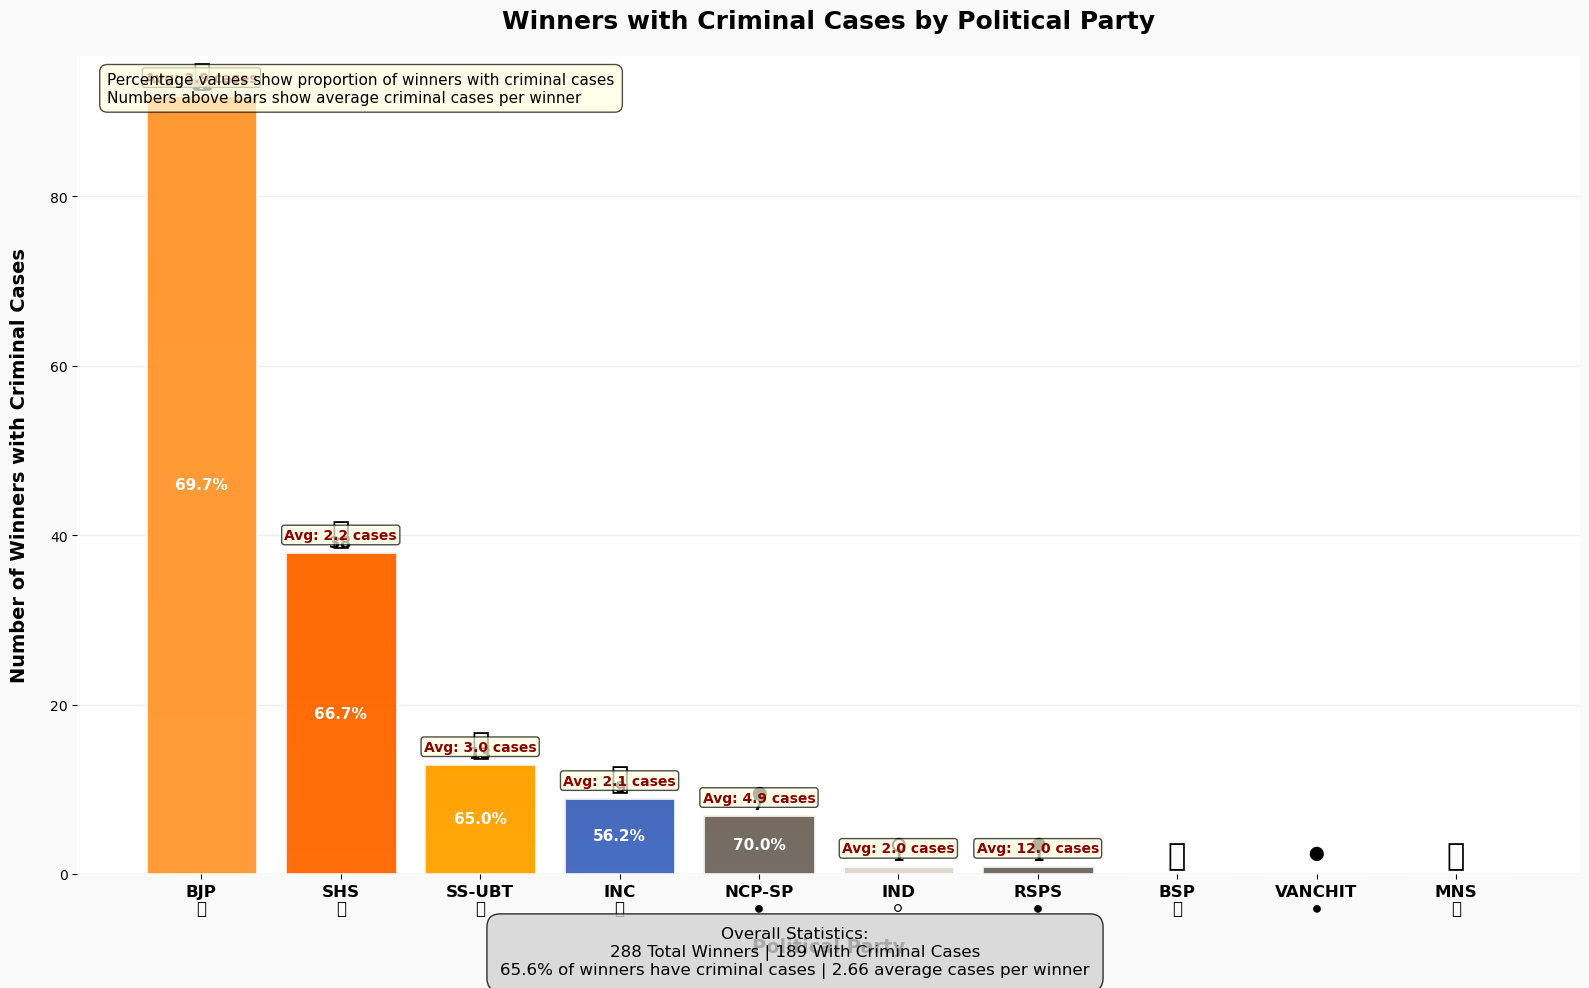


                WINNERS WITH CRIMINAL CASES - DETAILED ANALYSIS                 

Overall Statistics:
Total Winners: 288
Winners with Criminal Cases: 189 (65.6%)
Average Criminal Cases per Winner: 2.66

Party-wise Analysis:
🔸 BJP: 92/132 winners with cases (69.7%) | 2.87 average cases
🟠 SHS: 38/57 winners with cases (66.7%) | 2.16 average cases
🟊 SS-UBT: 13/20 winners with cases (65.0%) | 2.95 average cases
🟦 INC: 9/16 winners with cases (56.2%) | 2.06 average cases
⚫ NCP-SP: 7/10 winners with cases (70.0%) | 4.90 average cases
⚪ IND: 1/2 winners with cases (50.0%) | 2.00 average cases
⚫ RSPS: 1/1 winners with cases (100.0%) | 12.00 average cases
🟫 BSP: 0/0 winners with cases (0.0%) | nan average cases
⚫ VANCHIT: 0/0 winners with cases (0.0%) | nan average cases
🟧 MNS: 0/0 winners with cases (0.0%) | nan average cases

Criminal Cases Severity Analysis:
Number of criminal cases among winners:
1 case(s): 56 winners (29.6% of winners with cases)
2 case(s): 42 winners (22.2% of winners wi

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch, FancyBboxPatch
import matplotlib as mpl

# Set a professional style
plt.style.use('default')
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Load the data
df = pd.read_csv('total_cnd_Most_important_final_file_2.csv')

# Data preprocessing
df['Total_Assets_Value'] = pd.to_numeric(df['Total_Assets_Value'], errors='coerce')
df['Liabilities_Value'] = pd.to_numeric(df['Liabilities_Value'], errors='coerce')
df['Net_Worth'] = pd.to_numeric(df['Net_Worth'], errors='coerce')

# Fill NaN values with 0 for financial columns
df['Total_Assets_Value'].fillna(0, inplace=True)
df['Liabilities_Value'].fillna(0, inplace=True)
df['Net_Worth'].fillna(0, inplace=True)

# Create a simplified party column for better visualization
df['Party_Short'] = df['Party_std'].apply(lambda x: x.split()[0] if pd.notna(x) and len(x.split()) > 0 else 'Other')

# Map parties to symbols/emoji (approximate representations)
party_symbols = {
    'BJP': '🔸',  # Saffron color representation
    'SHS': '🟠',  # Shiv Sena - orange
    'INC': '🟦',  # Congress - blue
    'NCP': '🟩',  # NCP - green
    'IND': '⚪',  # Independent - white
    'BSP': '🟫',  # BSP - brown
    'VBA': '🔷',  # Vanchit Bahujan Aaghadi - blue diamond
    'MNS': '🟧',  # MNS - another orange
    'AIMIM': '🟥',  # AIMIM - red
    'SS-UBT': '🟊',  # Shiv Sena UBT - star
    'Other': '⚫'   # Other parties - black
}

# Create a custom color palette based on party symbols
party_colors = {
    'BJP': '#FF9933',  # Saffron
    'SHS': '#FF6600',  # Orange
    'INC': '#3366CC',  # Blue
    'NCP': '#66CC66',  # Green
    'IND': '#DDDDDD',  # Light Gray
    'BSP': '#8B4513',  # SaddleBrown
    'VBA': '#4169E1',  # RoyalBlue
    'MNS': '#FF8C00',  # DarkOrange
    'AIMIM': '#DC143C', # Crimson
    'SS-UBT': '#FFA500', # Orange
    'Other': '#666666'  # Dark Gray
}

# Get the top parties
top_parties = df['Party_Short'].value_counts().head(10).index.tolist()

# Create a single comprehensive visualization
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('#fafafa')  # Light background color

# Filter data for winners only
winners_df = df[df['Winner_Flag'] == 1]

# Prepare data for the visualization
party_data = []
for party in top_parties:
    party_winners = winners_df[winners_df['Party_Short'] == party]
    total_winners = len(party_winners)
    winners_with_cases = len(party_winners[party_winners['Criminal_Case'] > 0])
    winners_without_cases = total_winners - winners_with_cases
    avg_criminal_cases = party_winners['Criminal_Case'].mean()
    
    party_data.append({
        'party': party,
        'total_winners': total_winners,
        'winners_with_cases': winners_with_cases,
        'winners_without_cases': winners_without_cases,
        'avg_cases': avg_criminal_cases,
        'cases_percentage': (winners_with_cases / total_winners) * 100 if total_winners > 0 else 0
    })

# Sort by number of winners with cases
party_data.sort(key=lambda x: x['winners_with_cases'], reverse=True)

# Extract data for plotting
parties = [d['party'] for d in party_data]
winners_with_cases = [d['winners_with_cases'] for d in party_data]
winners_without_cases = [d['winners_without_cases'] for d in party_data]
avg_cases = [d['avg_cases'] for d in party_data]
cases_percentage = [d['cases_percentage'] for d in party_data]

# Set up the plot
x = np.arange(len(parties))
width = 0.8

# Create gradient bars
def create_gradient_bar(ax, x, height, width, color):
    for i, h in enumerate(height):
        if h > 0:
            gradient = np.linspace(0.7, 1.0, 100)
            for j in range(100):
                alpha = gradient[j]
                ax.bar(x[i], h/100, width, color=color, alpha=alpha, 
                       bottom=j*(h/100), edgecolor=None)

# Create bars with gradient effect for winners with cases
create_gradient_bar(ax, x, winners_with_cases, width, [party_colors.get(p, '#666666') for p in parties])

# Add outline to bars
bars = ax.bar(x, winners_with_cases, width, 
              color=[party_colors.get(p, '#666666') for p in parties], 
              alpha=0.9, edgecolor='white', linewidth=2)

# Add party symbols above the bars
for i, party in enumerate(parties):
    symbol = party_symbols.get(party, '⚫')
    ax.text(i, winners_with_cases[i] + 0.5, symbol, ha='center', va='bottom', 
            fontsize=22, fontweight='bold')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        # Add percentage label inside the bar
        percentage = cases_percentage[i]
        if height > 2:  # Only add percentage label if bar is tall enough
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                    f'{percentage:.1f}%', ha='center', va='center', 
                    fontsize=11, fontweight='bold', color='white')

# Add average criminal cases as text next to bars
for i, (party, cases) in enumerate(zip(parties, avg_cases)):
    if cases > 0:
        ax.text(i, winners_with_cases[i] + 1.2, 
                f'Avg: {cases:.1f} cases', ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='#8B0000',
                bbox=dict(boxstyle="round,pad=0.2", facecolor="lightyellow", alpha=0.7))

# Customize the chart
ax.set_ylabel('Number of Winners with Criminal Cases', fontsize=14, fontweight='bold', labelpad=15)
ax.set_xlabel('Political Party', fontsize=14, fontweight='bold', labelpad=15)
ax.set_title('Winners with Criminal Cases by Political Party', fontsize=18, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([f"{p}\n{party_symbols.get(p, '⚫')}" for p in parties], fontsize=12, fontweight='bold')

# Add a light grid for better readability
ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=1)
ax.set_axisbelow(True)

# Remove chart borders
for spine in ax.spines.values():
    spine.set_visible(False)

# Add a subtle horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=0.8, alpha=0.3)

# Add explanatory text
explanation_text = "Percentage values show proportion of winners with criminal cases\nNumbers above bars show average criminal cases per winner"
ax.text(0.02, 0.98, explanation_text, transform=ax.transAxes, fontsize=11, 
        verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.7))

# Add overall statistics
total_winners = len(winners_df)
winners_with_cases_total = len(winners_df[winners_df['Criminal_Case'] > 0])
percentage_with_cases = (winners_with_cases_total / total_winners) * 100
avg_cases_all = winners_df['Criminal_Case'].mean()

stats_text = f"Overall Statistics:\n{total_winners} Total Winners | {winners_with_cases_total} With Criminal Cases\n{percentage_with_cases:.1f}% of winners have criminal cases | {avg_cases_all:.2f} average cases per winner"
fig.text(0.5, 0.02, stats_text, fontsize=12, ha='center', 
         bbox=dict(boxstyle="round,pad=0.8", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Make room for the statistics text
plt.show()

# Print detailed statistics
print("\n" + "="*80)
print("WINNERS WITH CRIMINAL CASES - DETAILED ANALYSIS".center(80))
print("="*80)

print(f"\nOverall Statistics:")
print(f"Total Winners: {total_winners}")
print(f"Winners with Criminal Cases: {winners_with_cases_total} ({percentage_with_cases:.1f}%)")
print(f"Average Criminal Cases per Winner: {avg_cases_all:.2f}")

print(f"\nParty-wise Analysis:")
for data in party_data:
    party = data['party']
    print(f"{party_symbols.get(party, '⚫')} {party}: {data['winners_with_cases']}/{data['total_winners']} winners with cases " +
          f"({data['cases_percentage']:.1f}%) | {data['avg_cases']:.2f} average cases")

# Additional analysis: Seriousness of criminal cases
print(f"\nCriminal Cases Severity Analysis:")
cases_count = winners_df['Criminal_Case'].value_counts().sort_index()
print("Number of criminal cases among winners:")
for cases, count in cases_count.items():
    if cases > 0:
        print(f"{cases} case(s): {count} winners ({count/winners_with_cases_total*100:.1f}% of winners with cases)")